**Importing Google drive**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# **Importing libraries**

In [3]:
import pandas as pd
import numpy as np
import ast
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

C:\Users\mm8778k\AppData\Local\Temp\ipykernel_20816\3517851106.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# **Loading csv file into dataframe**

In [4]:
df = pd.read_csv('scraped_data_2.csv')
# df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/final_year_project/model/scraped_data_2.csv')

In [5]:
df.shape

(50613, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50613 entries, 0 to 50612
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 50613 non-null  object 
 1   type                50404 non-null  object 
 2   address             50404 non-null  object 
 3   location            50404 non-null  object 
 4   price               50404 non-null  object 
 5   average_sale_price  43659 non-null  float64
 6   shared_ownership    50613 non-null  int64  
 7   specs_list          50613 non-null  object 
 8   description_list    49652 non-null  object 
 9   description_text    50395 non-null  object 
 10  listing_data        50613 non-null  object 
 11  travel_times_list   50404 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.6+ MB


In [7]:
df.head()

,url,type,address,location,price,average_sale_price,shared_ownership,specs_list,description_list,description_text,listing_data,travel_times_list
0,https://www.zoopla.co.uk/for-sale/details/6656...,1 bed flat for sale,"Hornchurch Road, Hornchurch RM11","['51.564819', '0.200665']","£160,000",293750.0,0,"[('beds', '1 bed'), ('baths', '1 bath'), ('rec...","['Leasehold', 'EPC D', 'One bedroom', 'Second ...",Your Move is pleased to offer to the market th...,"[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.2 miles'), ('school', '0.4 mile..."
1,https://www.zoopla.co.uk/for-sale/details/6656...,Studio for sale,"St. Peters Road, Croydon CR0","['51.362907', '-0.09497']","£170,000",267049.0,0,"[('baths', '1 bath'), ('receptions', '1 recept...","['Leasehold', 'Period conversion flat', 'Top f...","No chain! Long lease, low service charges, wal...","[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.1 miles'), ('station', '0.1 mil..."
2,https://www.zoopla.co.uk/for-sale/details/6656...,Land for sale,"Ness Road, Erith DA8","['51.476364', '0.210603']","£175,000",NaN,0,"[('area', '60,984 sq. ft')]",['Freehold'],"Lots 5 & 6, Ness Road Erith. Approx 1.4 Acres ...","[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.8 miles'), ('station', '1.1 mil..."
3,https://www.zoopla.co.uk/for-sale/details/6656...,Land for sale,"Ness Road, Erith DA8","['51.477081', '0.208293']","£175,000",NaN,0,"[('area', '56,628 sq. ft')]","['Freehold', 'Lot 10', '1.24 Acres', 'Access f...","Lots 9,10,11 & 12, Ness Road Erith Approx 1.3 ...","[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.8 miles'), ('station', '1 mile'..."
4,https://www.zoopla.co.uk/new-homes/details/665...,2 bed flat for sale,"Bell Road, Hounslow TW3","['51.467051', '-0.365434']","£159,250",267402.0,1,"[('beds', '2 beds'), ('baths', '2 baths'), ('a...","['Leasehold', 'Communal garden', 'Terrace', 'D...","Minimum share value (35%) - £159,250 Full mark...",[],"[('school', '0.2 miles'), ('school', '0.3 mile..."


In [8]:
df = df.drop_duplicates(subset="description_text")

In [9]:
df.shape

(31055, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31055 entries, 0 to 50612
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 31055 non-null  object 
 1   type                31054 non-null  object 
 2   address             31054 non-null  object 
 3   location            31054 non-null  object 
 4   price               31054 non-null  object 
 5   average_sale_price  27022 non-null  float64
 6   shared_ownership    31055 non-null  int64  
 7   specs_list          31055 non-null  object 
 8   description_list    30583 non-null  object 
 9   description_text    31054 non-null  object 
 10  listing_data        31055 non-null  object 
 11  travel_times_list   31054 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.1+ MB


# **Initial cleaning and extraction of features from scrapped data**

**Extracting the types only from 'type' column**

In [11]:
df['type'] = df['type'].str.replace(r'\d+\sbed\s|\sfor sale', '', regex=True)
df.head()

,url,type,address,location,price,average_sale_price,shared_ownership,specs_list,description_list,description_text,listing_data,travel_times_list
0,https://www.zoopla.co.uk/for-sale/details/6656...,flat,"Hornchurch Road, Hornchurch RM11","['51.564819', '0.200665']","£160,000",293750.0,0,"[('beds', '1 bed'), ('baths', '1 bath'), ('rec...","['Leasehold', 'EPC D', 'One bedroom', 'Second ...",Your Move is pleased to offer to the market th...,"[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.2 miles'), ('school', '0.4 mile..."
1,https://www.zoopla.co.uk/for-sale/details/6656...,Studio,"St. Peters Road, Croydon CR0","['51.362907', '-0.09497']","£170,000",267049.0,0,"[('baths', '1 bath'), ('receptions', '1 recept...","['Leasehold', 'Period conversion flat', 'Top f...","No chain! Long lease, low service charges, wal...","[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.1 miles'), ('station', '0.1 mil..."
2,https://www.zoopla.co.uk/for-sale/details/6656...,Land,"Ness Road, Erith DA8","['51.476364', '0.210603']","£175,000",NaN,0,"[('area', '60,984 sq. ft')]",['Freehold'],"Lots 5 & 6, Ness Road Erith. Approx 1.4 Acres ...","[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.8 miles'), ('station', '1.1 mil..."
3,https://www.zoopla.co.uk/for-sale/details/6656...,Land,"Ness Road, Erith DA8","['51.477081', '0.208293']","£175,000",NaN,0,"[('area', '56,628 sq. ft')]","['Freehold', 'Lot 10', '1.24 Acres', 'Access f...","Lots 9,10,11 & 12, Ness Road Erith Approx 1.3 ...","[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.8 miles'), ('station', '1 mile'..."
4,https://www.zoopla.co.uk/new-homes/details/665...,flat,"Bell Road, Hounslow TW3","['51.467051', '-0.365434']","£159,250",267402.0,1,"[('beds', '2 beds'), ('baths', '2 baths'), ('a...","['Leasehold', 'Communal garden', 'Terrace', 'D...","Minimum share value (35%) - £159,250 Full mark...",[],"[('school', '0.2 miles'), ('school', '0.3 mile..."


**Preprocessing 'specs_list' column to exctract the main features**

In [12]:
# Defining the function which will extract the features and create seprate columns

def extract_mainfs(row):
    # Initialise the distances with None
    main_f = {'beds': None, 'baths': None, 'receptions': None, 'area': None, 'epc rating': None}

    try:
        # Convert the string representation of the list of tuples into an actual list of tuples
        travel_list = ast.literal_eval(row)


        for item in travel_list:
            # Check if the item is a tuple and has two elements (place, distance)
            if isinstance(item, tuple) and len(item) == 2:
                x, y = item


                if x == 'beds':
                    main_f['beds'] = y

                if x == 'baths':
                    main_f['baths'] = y

                if x == 'receptions':
                    main_f['receptions'] = y

                if x == 'area':
                    main_f['area'] = y

                if x == 'epc rating':
                    main_f['epc rating'] = y



    except (ValueError, SyntaxError):
        # In case of parsing error, the values will remain None
        pass

    return pd.Series(main_f)

# Applying the function to each row in the DataFrame
extracted_columns = df['specs_list'].apply(extract_mainfs)


# Merging the new columns with the original DataFrame
df2 = pd.concat([df, extracted_columns], axis=1)

# Dropping 'specs' column as no longer needed
df2 = df2.drop(['specs_list'], axis=1)


In [13]:
df2.head()

,url,type,address,location,price,average_sale_price,shared_ownership,description_list,description_text,listing_data,travel_times_list,beds,baths,receptions,area,epc rating
0,https://www.zoopla.co.uk/for-sale/details/6656...,flat,"Hornchurch Road, Hornchurch RM11","['51.564819', '0.200665']","£160,000",293750.0,0,"['Leasehold', 'EPC D', 'One bedroom', 'Second ...",Your Move is pleased to offer to the market th...,"[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.2 miles'), ('school', '0.4 mile...",1 bed,1 bath,1 reception,None,None
1,https://www.zoopla.co.uk/for-sale/details/6656...,Studio,"St. Peters Road, Croydon CR0","['51.362907', '-0.09497']","£170,000",267049.0,0,"['Leasehold', 'Period conversion flat', 'Top f...","No chain! Long lease, low service charges, wal...","[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.1 miles'), ('station', '0.1 mil...",None,1 bath,1 reception,None,None
2,https://www.zoopla.co.uk/for-sale/details/6656...,Land,"Ness Road, Erith DA8","['51.476364', '0.210603']","£175,000",NaN,0,['Freehold'],"Lots 5 & 6, Ness Road Erith. Approx 1.4 Acres ...","[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.8 miles'), ('station', '1.1 mil...",None,None,None,"60,984 sq. ft",None
3,https://www.zoopla.co.uk/for-sale/details/6656...,Land,"Ness Road, Erith DA8","['51.477081', '0.208293']","£175,000",NaN,0,"['Freehold', 'Lot 10', '1.24 Acres', 'Access f...","Lots 9,10,11 & 12, Ness Road Erith Approx 1.3 ...","[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.8 miles'), ('station', '1 mile'...",None,None,None,"56,628 sq. ft",None
4,https://www.zoopla.co.uk/new-homes/details/665...,flat,"Bell Road, Hounslow TW3","['51.467051', '-0.365434']","£159,250",267402.0,1,"['Leasehold', 'Communal garden', 'Terrace', 'D...","Minimum share value (35%) - £159,250 Full mark...",[],"[('school', '0.2 miles'), ('school', '0.3 mile...",2 beds,2 baths,None,920 sq. ft,None


In [14]:
# Cleaning beds, baths, receptions column to only numeric values using regular expression
df2['beds'] = df2['beds'].astype(str).str.extract('(\d+)').fillna(0).astype(int)

df2['baths'] = df2['baths'].astype(str).str.extract('(\d+)').fillna(0).astype(int)

df2['receptions'] = df2['receptions'].astype(str).str.extract('(\d+)').fillna(0).astype(int)


# Cleaning 'epc rating' column to just Alpha character
df2['epc rating'] = df2['epc rating'].str.replace('EPC rating: ', '')
df2.head()


,url,type,address,location,price,average_sale_price,shared_ownership,description_list,description_text,listing_data,travel_times_list,beds,baths,receptions,area,epc rating
0,https://www.zoopla.co.uk/for-sale/details/6656...,flat,"Hornchurch Road, Hornchurch RM11","['51.564819', '0.200665']","£160,000",293750.0,0,"['Leasehold', 'EPC D', 'One bedroom', 'Second ...",Your Move is pleased to offer to the market th...,"[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.2 miles'), ('school', '0.4 mile...",1,1,1,None,None
1,https://www.zoopla.co.uk/for-sale/details/6656...,Studio,"St. Peters Road, Croydon CR0","['51.362907', '-0.09497']","£170,000",267049.0,0,"['Leasehold', 'Period conversion flat', 'Top f...","No chain! Long lease, low service charges, wal...","[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.1 miles'), ('station', '0.1 mil...",0,1,1,None,None
2,https://www.zoopla.co.uk/for-sale/details/6656...,Land,"Ness Road, Erith DA8","['51.476364', '0.210603']","£175,000",NaN,0,['Freehold'],"Lots 5 & 6, Ness Road Erith. Approx 1.4 Acres ...","[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.8 miles'), ('station', '1.1 mil...",0,0,0,"60,984 sq. ft",None
3,https://www.zoopla.co.uk/for-sale/details/6656...,Land,"Ness Road, Erith DA8","['51.477081', '0.208293']","£175,000",NaN,0,"['Freehold', 'Lot 10', '1.24 Acres', 'Access f...","Lots 9,10,11 & 12, Ness Road Erith Approx 1.3 ...","[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.8 miles'), ('station', '1 mile'...",0,0,0,"56,628 sq. ft",None
4,https://www.zoopla.co.uk/new-homes/details/665...,flat,"Bell Road, Hounslow TW3","['51.467051', '-0.365434']","£159,250",267402.0,1,"['Leasehold', 'Communal garden', 'Terrace', 'D...","Minimum share value (35%) - £159,250 Full mark...",[],"[('school', '0.2 miles'), ('school', '0.3 mile...",2,2,0,920 sq. ft,None


In [15]:
# Cleaning area so and setting type to float
def clean_area(area):
    if pd.isna(area):
        return None
    area = area.replace(' sq. ft', '').replace(',', '').strip()
    if 'From' in area:
        # Handle 'From ... - ...' format by extracting the numbers and calculating the average
        range_vals = area.replace('From', '').split('-')
        return sum(float(val.strip()) for val in range_vals) / len(range_vals)
    elif '-' in area:
        # Handle simple range format
        range_vals = area.split('-')
        return sum(float(val.strip()) for val in range_vals) / len(range_vals)
    else:
        # Standard case: just convert to float
        return float(area)


df2['area'] = df2['area'].apply(clean_area)

df2.head()

,url,type,address,location,price,average_sale_price,shared_ownership,description_list,description_text,listing_data,travel_times_list,beds,baths,receptions,area,epc rating
0,https://www.zoopla.co.uk/for-sale/details/6656...,flat,"Hornchurch Road, Hornchurch RM11","['51.564819', '0.200665']","£160,000",293750.0,0,"['Leasehold', 'EPC D', 'One bedroom', 'Second ...",Your Move is pleased to offer to the market th...,"[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.2 miles'), ('school', '0.4 mile...",1,1,1,NaN,None
1,https://www.zoopla.co.uk/for-sale/details/6656...,Studio,"St. Peters Road, Croydon CR0","['51.362907', '-0.09497']","£170,000",267049.0,0,"['Leasehold', 'Period conversion flat', 'Top f...","No chain! Long lease, low service charges, wal...","[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.1 miles'), ('station', '0.1 mil...",0,1,1,NaN,None
2,https://www.zoopla.co.uk/for-sale/details/6656...,Land,"Ness Road, Erith DA8","['51.476364', '0.210603']","£175,000",NaN,0,['Freehold'],"Lots 5 & 6, Ness Road Erith. Approx 1.4 Acres ...","[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.8 miles'), ('station', '1.1 mil...",0,0,0,60984.0,None
3,https://www.zoopla.co.uk/for-sale/details/6656...,Land,"Ness Road, Erith DA8","['51.477081', '0.208293']","£175,000",NaN,0,"['Freehold', 'Lot 10', '1.24 Acres', 'Access f...","Lots 9,10,11 & 12, Ness Road Erith Approx 1.3 ...","[('first_published_date', '2024-02-05'), ('fir...","[('school', '0.8 miles'), ('station', '1 mile'...",0,0,0,56628.0,None
4,https://www.zoopla.co.uk/new-homes/details/665...,flat,"Bell Road, Hounslow TW3","['51.467051', '-0.365434']","£159,250",267402.0,1,"['Leasehold', 'Communal garden', 'Terrace', 'D...","Minimum share value (35%) - £159,250 Full mark...",[],"[('school', '0.2 miles'), ('school', '0.3 mile...",2,2,0,920.0,None


In [16]:
# Dropping rows which has not description list
df2 = df2.dropna(subset=['description_list'])

In [17]:
# Converting the 'desc_list' from string to actual lists
df2['description_list'] = df2['description_list'].apply(ast.literal_eval)

# Counting the frequency of each description
all_descriptions = [item for sublist in df2['description_list'] for item in sublist]
description_counts = Counter(all_descriptions)

# Displaying the most common descriptions and their counts
most_common_descriptions = description_counts.most_common()
most_common_descriptions[:20]  # Displaying top 20 for brevity

[('Leasehold', 13661),
 ('Freehold', 10749),
 ('Share of freehold', 3337),
 ('Balcony', 1800),
 ('Chain Free', 1512),
 ('Two Bathrooms', 1163),
 ('Chain free', 1105),
 ('Off street parking', 937),
 ('Two Double Bedrooms', 936),
 ('Double glazing', 884),
 ('Three Bedrooms', 857),
 ('Off Street Parking', 851),
 ('Garage', 841),
 ('Lift', 750),
 ('No Onward Chain', 739),
 ('Two bathrooms', 731),
 ('Two Bedrooms', 724),
 ('Kitchen', 724),
 ('Garden', 722),
 ('Concierge', 699)]

**Grouping similar descriptions list**

In [18]:
# Manually defining a few groups based on common
grouped_descriptions = {
    'Leasehold': ['Leasehold'],
    'Freehold': ['Freehold'],
    'Share of freehold': ['Share of freehold'],
    'Balcony': ['Balcony'],
    'Gym': ['Gym'],
    'Garden': ['Garden'],
    'Garage' : ['Garage'],
}

# Creating a binary feature for each group
for group, descriptions in grouped_descriptions.items():
    df2[group] = df2['description_list'].apply(lambda x: int(any(desc in x for desc in descriptions)))

In [19]:
# Showing the first few rows of the updated dataset with grouped binary features
df2[['type', 'location', 'price', 'Leasehold', 'Freehold', 'Share of freehold', 'Balcony', 'Gym', 'Garden', 'Garage']].head(10)

,type,location,price,Leasehold,Freehold,Share of freehold,Balcony,Gym,Garden,Garage
0,flat,"['51.564819', '0.200665']","£160,000",1,0,0,0,0,0,0
1,Studio,"['51.362907', '-0.09497']","£170,000",1,0,0,0,0,0,0
2,Land,"['51.476364', '0.210603']","£175,000",0,1,0,0,0,0,0
3,Land,"['51.477081', '0.208293']","£175,000",0,1,0,0,0,0,0
4,flat,"['51.467051', '-0.365434']","£159,250",1,0,0,0,0,0,0
5,flat,"['51.473819', '-0.0209']","£164,000",1,0,0,0,0,0,0
6,flat,"['51.591758', '-0.258541']","£161,000",1,0,0,1,0,0,0
7,Land,"['51.519104', '-0.424203']","£175,000",0,1,0,0,0,0,0
8,flat,"['51.518543', '0.021194']","£150,000",1,0,0,0,0,0,0
9,flat,"['51.478871', '-0.140587']","£156,250",0,0,0,0,0,0,0


In [20]:
df2 = df2.drop('description_list', axis=1)

**Extracting the distances and creating seprate columns from the travel_times column**

In [21]:
def extract_distances(row):
    # Initialise the distances with None
    distances = {'school1': None, 'school2': None, 'station1': None, 'station2': None}

    try:
        # Convert the string representation of the list of tuples into an actual list of tuples
        travel_list = ast.literal_eval(row)

        # Counters for schools and stations
        school_count, station_count = 0, 0

        for item in travel_list:
            # Check if the item is a tuple and has two elements (place, distance)
            if isinstance(item, tuple) and len(item) == 2:
                place, distance = item

                # Extract the distance for schools
                if place == 'school':
                    school_count += 1
                    if school_count == 1:
                        distances['school1'] = distance
                    elif school_count == 2:
                        distances['school2'] = distance

                # Extract the distance for stations
                if place == 'station':
                    station_count += 1
                    if station_count == 1:
                        distances['station1'] = distance
                    elif station_count == 2:
                        distances['station2'] = distance

    except (ValueError, SyntaxError):
        # In case of parsing error, the values will remain None
        pass

    return pd.Series(distances)

# Applying the function to each row in the DF
extracted_columns = df2['travel_times_list'].apply(extract_distances)

# Merging the new columns with the original DF
df2 = pd.concat([df2, extracted_columns], axis=1)

# Dropping as 'travel_times' column as no longer needed
df2 = df2.drop('travel_times_list', axis=1)

# Displaying the first few rows of the updated DF
df2.head()

,url,type,address,location,price,average_sale_price,shared_ownership,description_text,listing_data,beds,...,Freehold,Share of freehold,Balcony,Gym,Garden,Garage,school1,school2,station1,station2
0,https://www.zoopla.co.uk/for-sale/details/6656...,flat,"Hornchurch Road, Hornchurch RM11","['51.564819', '0.200665']","£160,000",293750.0,0,Your Move is pleased to offer to the market th...,"[('first_published_date', '2024-02-05'), ('fir...",1,...,0,0,0,0,0,0,0.2 miles,0.4 miles,0.9 miles,1 mile
1,https://www.zoopla.co.uk/for-sale/details/6656...,Studio,"St. Peters Road, Croydon CR0","['51.362907', '-0.09497']","£170,000",267049.0,0,"No chain! Long lease, low service charges, wal...","[('first_published_date', '2024-02-05'), ('fir...",0,...,0,0,0,0,0,0,0.1 miles,0.2 miles,0.1 miles,0.9 miles
2,https://www.zoopla.co.uk/for-sale/details/6656...,Land,"Ness Road, Erith DA8","['51.476364', '0.210603']","£175,000",NaN,0,"Lots 5 & 6, Ness Road Erith. Approx 1.4 Acres ...","[('first_published_date', '2024-02-05'), ('fir...",0,...,1,0,0,0,0,0,0.8 miles,1.2 miles,1.1 miles,1.2 miles
3,https://www.zoopla.co.uk/for-sale/details/6656...,Land,"Ness Road, Erith DA8","['51.477081', '0.208293']","£175,000",NaN,0,"Lots 9,10,11 & 12, Ness Road Erith Approx 1.3 ...","[('first_published_date', '2024-02-05'), ('fir...",0,...,1,0,0,0,0,0,0.8 miles,1.2 miles,1 mile,1.3 miles
4,https://www.zoopla.co.uk/new-homes/details/665...,flat,"Bell Road, Hounslow TW3","['51.467051', '-0.365434']","£159,250",267402.0,1,"Minimum share value (35%) - £159,250 Full mark...",[],2,...,0,0,0,0,0,0,0.2 miles,0.3 miles,0.3 miles,0.4 miles


In [22]:
# Converting extraced column to float
def convert_to_float(distance_str):
    if pd.isna(distance_str):
        return None
    try:
        # Remove 'miles' and convert to float
        return float(distance_str.replace('miles', '').strip())
    except ValueError:
        # In case the conversion fails
        return None

# Applying the conversion to each of the distance columns
for column in ['school1', 'school2', 'station1', 'station2']:
    df2[column] = df2[column].apply(convert_to_float)


In [23]:
df2 = df2[df2['price'] != 'Coming soon']
df2 = df2[df2['price'] != 'Sale by tender']

In [24]:
# Stripping '£' from price
df2['price'] = df2['price'].replace('[\£,]', '', regex=True).astype(float)

In [25]:
df2.head()

,url,type,address,location,price,average_sale_price,shared_ownership,description_text,listing_data,beds,...,Freehold,Share of freehold,Balcony,Gym,Garden,Garage,school1,school2,station1,station2
0,https://www.zoopla.co.uk/for-sale/details/6656...,flat,"Hornchurch Road, Hornchurch RM11","['51.564819', '0.200665']",160000.0,293750.0,0,Your Move is pleased to offer to the market th...,"[('first_published_date', '2024-02-05'), ('fir...",1,...,0,0,0,0,0,0,0.2,0.4,0.9,NaN
1,https://www.zoopla.co.uk/for-sale/details/6656...,Studio,"St. Peters Road, Croydon CR0","['51.362907', '-0.09497']",170000.0,267049.0,0,"No chain! Long lease, low service charges, wal...","[('first_published_date', '2024-02-05'), ('fir...",0,...,0,0,0,0,0,0,0.1,0.2,0.1,0.9
2,https://www.zoopla.co.uk/for-sale/details/6656...,Land,"Ness Road, Erith DA8","['51.476364', '0.210603']",175000.0,NaN,0,"Lots 5 & 6, Ness Road Erith. Approx 1.4 Acres ...","[('first_published_date', '2024-02-05'), ('fir...",0,...,1,0,0,0,0,0,0.8,1.2,1.1,1.2
3,https://www.zoopla.co.uk/for-sale/details/6656...,Land,"Ness Road, Erith DA8","['51.477081', '0.208293']",175000.0,NaN,0,"Lots 9,10,11 & 12, Ness Road Erith Approx 1.3 ...","[('first_published_date', '2024-02-05'), ('fir...",0,...,1,0,0,0,0,0,0.8,1.2,NaN,1.3
4,https://www.zoopla.co.uk/new-homes/details/665...,flat,"Bell Road, Hounslow TW3","['51.467051', '-0.365434']",159250.0,267402.0,1,"Minimum share value (35%) - £159,250 Full mark...",[],2,...,0,0,0,0,0,0,0.2,0.3,0.3,0.4


# **Handling missing values**

In [26]:
# Defining a function to impute leasehold, free hold
def impute_one_hot(df):
    # Create a mask for rows
    mask = (df['Leasehold'] == 0) & (df['Freehold'] == 0) & (df['Share of freehold'] == 0)

    # Impute 'leasehold' to 1 when 'type' is 'flat' for the selected rows
    df.loc[mask & (df['type'] == 'flat'), 'Leasehold'] = 1

    # Impute 'freehold' to 1 when 'type' is one of the specified types for the selected rows
    specified_types = ['terraced_house', 'maisonette', 'end terrace house','detached house', 'semidetached house', 'terraced house']
    df.loc[mask & df['type'].isin(specified_types), 'Freehold'] = 1

    return df

# Apply the function to the DataFrame
df2 = impute_one_hot(df2)

In [27]:
# Checking for columns with null values
df2.isnull().sum()

url                       0
type                      0
address                   0
location                  0
price                     0
average_sale_price     3912
shared_ownership          0
description_text          0
listing_data              0
beds                      0
baths                     0
receptions                0
area                  22104
epc rating            30568
Leasehold                 0
Freehold                  0
Share of freehold         0
Balcony                   0
Gym                       0
Garden                    0
Garage                    0
school1                   8
school2                  40
station1                810
station2               4003
dtype: int64

In [28]:
# Deleting where beds and baths is zero
df2 = df2[df2['beds']!=0]
df2 = df2[df2['baths']!=0]

In [29]:
# Dropping rows which has not description text
df2.dropna(subset=['description_text'], inplace=True)

In [201]:
df3 = df2.copy()

In [202]:
# Dropping some 'listing_data' column as it has not of use for now
df3 = df3.drop('listing_data', axis=1)

In [204]:
# Extracting lat and lon from location column
df3['location'] = df3['location'].apply(ast.literal_eval)
df3['latitude'] = df3['location'].apply(lambda x: float(x[0]))
df3['longitude'] = df3['location'].apply(lambda x: float(x[1]))

df3 = df3.drop('location', axis=1)

In [208]:
df3[['beds', 'baths', 'receptions', 'price', 'average_sale_price', 'station1','station2', 'school1', 'school2', 'latitude', 'longitude']].describe()

,beds,baths,receptions,price,average_sale_price,station1,station2,school1,school2,latitude,longitude
count,29076.000000,29076.000000,29076.000000,2.907600e+04,2.542300e+04,28300.000000,25241.000000,29068.000000,29038.000000,29076.000000,29076.000000
mean,2.598535,1.699271,1.249966,9.318580e+05,7.516716e+05,0.372131,0.602734,0.188059,0.278628,51.502903,-0.145873
std,1.290733,0.830262,0.709189,6.188767e+05,5.615154e+05,0.268949,0.368534,0.118363,0.140463,0.069626,0.128595
min,1.000000,1.000000,0.000000,1.500000e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,51.288409,-0.520189
25%,2.000000,1.000000,1.000000,4.750000e+05,4.339630e+05,0.200000,0.300000,0.100000,0.200000,51.465180,-0.213387
50%,2.000000,2.000000,1.000000,7.800000e+05,5.767290e+05,0.300000,0.500000,0.200000,0.300000,51.503875,-0.151910
75%,3.000000,2.000000,1.000000,1.200000e+06,9.284270e+05,0.500000,0.800000,0.200000,0.300000,51.544964,-0.075639
max,22.000000,10.000000,15.000000,3.000000e+06,1.204808e+07,3.400000,3.800000,1.900000,1.900000,51.717948,0.309527


In [32]:
# As school1, station1, station2 have some missing values which means it is missing that amenity to address this we will assign the unique value -1
df3['school1'].fillna(-1, inplace=True)
df3['school2'].fillna(-1, inplace=True)
df3['station1'].fillna(-1, inplace=True)
df3['station2'].fillna(-1, inplace=True)

C:\Users\mm8778k\AppData\Local\Temp\ipykernel_20816\333645004.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['school1'].fillna(-1, inplace=True)
C:\Users\mm8778k\AppData\Local\Temp\ipykernel_20816\333645004.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

# **EDA**

In [34]:
# Analysing numerical data
df3.describe()

,price,average_sale_price,shared_ownership,beds,baths,receptions,area,Leasehold,Freehold,Share of freehold,Balcony,Gym,Garden,Garage,school1,school2,station1,station2,latitude,longitude
count,2.907600e+04,2.542300e+04,29076.000000,29076.000000,29076.000000,29076.000000,8.181000e+03,29076.000000,29076.000000,29076.000000,29076.000000,29076.000000,29076.000000,29076.000000,29076.000000,29076.000000,29076.000000,29076.000000,29076.000000,29076.000000
mean,9.318580e+05,7.516716e+05,0.009836,2.598535,1.699271,1.249966,1.354295e+03,0.528649,0.355964,0.104244,0.059878,0.014239,0.024075,0.028443,0.187732,0.276957,0.335510,0.391340,51.502903,-0.145873
std,6.188767e+05,5.615154e+05,0.098691,1.290733,0.830262,0.709189,1.852631e+04,0.499187,0.478813,0.305582,0.237264,0.118475,0.153284,0.166237,0.119976,0.147777,0.345415,0.641899,0.069626,0.128595
min,1.500000e+05,0.000000e+00,0.000000,1.000000,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,51.288409,-0.520189
25%,4.750000e+05,4.339630e+05,0.000000,2.000000,1.000000,1.000000,7.090000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.200000,0.200000,0.300000,51.465180,-0.213387
50%,7.800000e+05,5.767290e+05,0.000000,2.000000,2.000000,1.000000,9.470000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.300000,0.500000,51.503875,-0.151910
75%,1.200000e+06,9.284270e+05,0.000000,3.000000,2.000000,1.000000,1.356000e+03,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.500000,0.700000,51.544964,-0.075639
max,3.000000e+06,1.204808e+07,1.000000,22.000000,10.000000,15.000000,1.675000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.900000,1.900000,3.400000,3.800000,51.717948,0.309527


<Axes: ylabel='beds'>

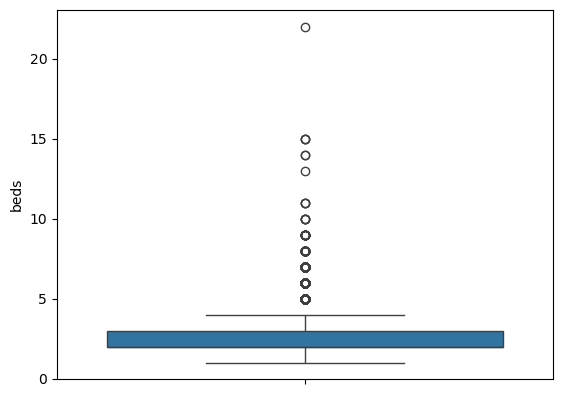

In [35]:
# Checking for outliers in beds
sns.boxplot(df3['beds'])

<Axes: ylabel='baths'>

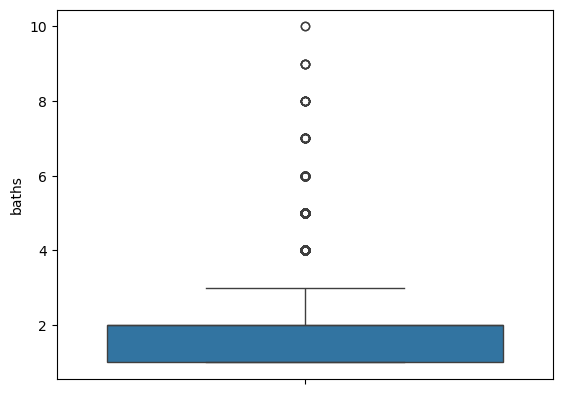

In [36]:
# Checking for outliers in baths
sns.boxplot(df3['baths'])

In [37]:
# Removing Outliers
# Calculate mean and standard deviation for 'baths' and 'beds'
mean_baths = df3['baths'].mean()
std_baths = df3['baths'].std()

mean_beds = df3['beds'].mean()
std_beds = df3['beds'].std()

# Define the threshold (3 standard deviation from the mean)
threshold_baths = 3 * std_baths
threshold_beds = 3 * std_beds

# Filter outliers
df3 = df3[
    (df3['baths'] >= mean_baths - threshold_baths) & (df3['baths'] <= mean_baths + threshold_baths) &
    (df3['beds'] >= mean_beds - threshold_beds) & (df3['beds'] <= mean_beds + threshold_beds)
]

<Axes: ylabel='beds'>

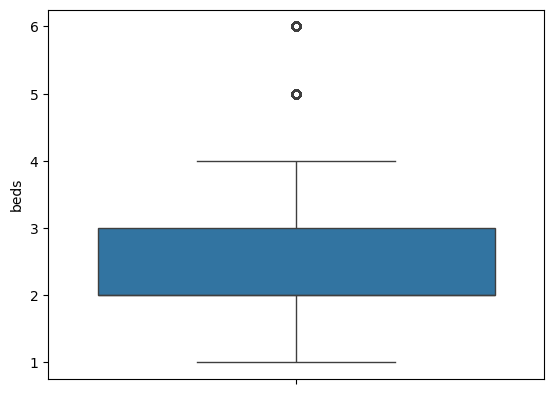

In [38]:
# Checking again for outliers in beds
sns.boxplot(df3['beds'])

<Axes: ylabel='baths'>

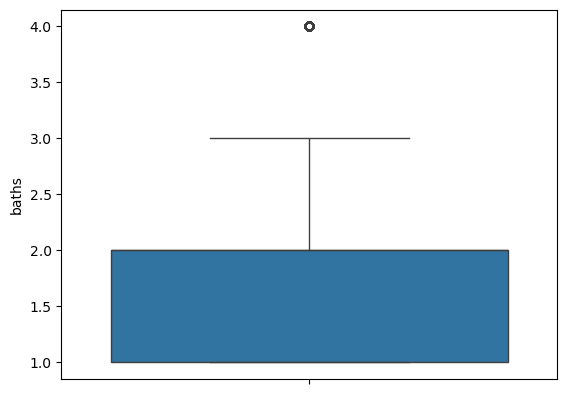

In [39]:
# Checking again for outliers in baths
sns.boxplot(df3['baths'])

In [40]:
df3.isnull().sum()

url                       0
type                      0
address                   0
price                     0
average_sale_price     3596
shared_ownership          0
description_text          0
beds                      0
baths                     0
receptions                0
area                  20638
epc rating            28706
Leasehold                 0
Freehold                  0
Share of freehold         0
Balcony                   0
Gym                       0
Garden                    0
Garage                    0
school1                   0
school2                   0
station1                  0
station2                  0
latitude                  0
longitude                 0
dtype: int64

In [41]:
# Dropping epc rating column as most of the information is missing
df4 = df3.drop(['epc rating'], axis=1)
df4.head()

,url,type,address,price,average_sale_price,shared_ownership,description_text,beds,baths,receptions,...,Balcony,Gym,Garden,Garage,school1,school2,station1,station2,latitude,longitude
0,https://www.zoopla.co.uk/for-sale/details/6656...,flat,"Hornchurch Road, Hornchurch RM11",160000.0,293750.0,0,Your Move is pleased to offer to the market th...,1,1,1,...,0,0,0,0,0.2,0.4,0.9,-1.0,51.564819,0.200665
4,https://www.zoopla.co.uk/new-homes/details/665...,flat,"Bell Road, Hounslow TW3",159250.0,267402.0,1,"Minimum share value (35%) - £159,250 Full mark...",2,2,0,...,0,0,0,0,0.2,0.3,0.3,0.4,51.467051,-0.365434
6,https://www.zoopla.co.uk/for-sale/details/6655...,flat,"Trent House, Silverworks Close, London NW9",161000.0,361770.0,1,"Offered on a 35% shared ownership basis, this ...",2,1,1,...,1,0,0,0,0.0,0.2,0.4,0.8,51.591758,-0.258541
8,https://www.zoopla.co.uk/for-sale/details/6655...,flat,"88 Ling Road, Canning Town, London E16",150000.0,376823.0,0,"For sale by auction 22/02/2024 £150,000 plus A...",2,1,0,...,0,0,0,0,0.1,0.1,0.6,0.7,51.518543,0.021194
11,https://www.zoopla.co.uk/for-sale/details/6655...,flat,"3-5 Prince Georges Road 2Fg, London SW19",168000.0,510227.0,1,"Shared Ownership Full Market Value: £480,000 S...",2,2,1,...,1,0,0,0,0.3,0.4,0.3,0.6,51.413238,-0.178037


In [42]:
# Analysis of shared_ownership column
filtered_df = df4[df4['shared_ownership'] == 1]
count = len(filtered_df)

print("Count of data points where 'shared ownership' is 1:", count)

df4 = df4[df4['shared_ownership'] != 1]

Count of data points where 'shared ownership' is 1: 286


In [43]:
df4 = df4[df4['shared_ownership'] != 1]

In [44]:
# Deleting hence it does not help with valuation
df4 = df4.drop('shared_ownership', axis=1)

In [45]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28420 entries, 0 to 50612
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 28420 non-null  object 
 1   type                28420 non-null  object 
 2   address             28420 non-null  object 
 3   price               28420 non-null  float64
 4   average_sale_price  24828 non-null  float64
 5   description_text    28420 non-null  object 
 6   beds                28420 non-null  int32  
 7   baths               28420 non-null  int32  
 8   receptions          28420 non-null  int32  
 9   area                7974 non-null   float64
 10  Leasehold           28420 non-null  int64  
 11  Freehold            28420 non-null  int64  
 12  Share of freehold   28420 non-null  int64  
 13  Balcony             28420 non-null  int64  
 14  Gym                 28420 non-null  int64  
 15  Garden              28420 non-null  int64  
 16  Garage   

In [46]:
df4 = df4.dropna(subset=['average_sale_price'])

In [47]:
# Counting the number of each property type we have
type_counts = df4.groupby('type')['type'].agg('count')
print(type_counts)

type
Serviced flat                       1
Serviced semi-detached house        1
Serviced town house                 2
Studio                             58
bungalow                          160
cottage                            21
country house                       5
detached bungalow                 100
detached house                   1768
end terrace house                 840
flat                            14865
link-detached house                47
maisonette                        778
mews house                         96
mobile/park home                    5
penthouse                          36
semi-detached bungalow             72
semi-detached house              2875
shared accommodation                1
terraced house                   2970
town house                        127
Name: type, dtype: int64


In [48]:
# Filter the types with counts greater than or equal to 50
types_to_keep = type_counts[type_counts >=500].index.tolist()

# Filter the DataFrame to keep only rows with 'type' values in types_to_keep
df4 = df4[df4['type'].isin(types_to_keep)]

In [49]:
# Counting the number of each property type we have
type_counts = df4.groupby('type')['type'].agg('count')
print(type_counts)

type
detached house          1768
end terrace house        840
flat                   14865
maisonette               778
semi-detached house     2875
terraced house          2970
Name: type, dtype: int64


In [50]:
df4.isnull().sum()

url                       0
type                      0
address                   0
price                     0
average_sale_price        0
description_text          0
beds                      0
baths                     0
receptions                0
area                  17618
Leasehold                 0
Freehold                  0
Share of freehold         0
Balcony                   0
Gym                       0
Garden                    0
Garage                    0
school1                   0
school2                   0
station1                  0
station2                  0
latitude                  0
longitude                 0
dtype: int64

In [51]:
df5 = df4.copy()

In [52]:
df5=df5.drop('area', axis=1)

In [53]:
# # Function to extract area from the description list
# def extract_area(desc):
#     # Regular expression to find area patterns
#     area_patterns = area_patterns = [
#     # Patterns for square feet and related units, no conversion needed, factor is 1
#     (r'(\d{2,4})\s*sq\s*ft', 1),       # e.g., 500 sq ft
#     (r'(\d{2,4})\s*square\s*feet', 1), # e.g., 500 square feet
#     (r'(\d{2,4})\s*ft²', 1),           # e.g., 500 ft²
#     (r'(\d{2,4})\s*sq\s*foot', 1),     # e.g., 500 sq foot
#     (r'(\d{2,4})\s*sq\s*feet', 1),     # e.g., 500 sq feet

#     # Patterns for square meters and related units, conversion needed, factor is 10.7639
#     (r'(\d{2,4})\s*m²', 10.7639),           # e.g., 500 m²
#     (r'(\d{2,4})\s*sq\s*m', 10.7639),       # e.g., 500 sq m
#     (r'(\d{2,4})\s*sq\.?\s*meters', 10.7639), # e.g., 500 sq. meters or 500 sq meters
#     (r'(\d{2,4})\s*sqm', 10.7639),          # e.g., 500sqm
#     (r'(\d{2,4})\s*sq\s*metres', 10.7639),  # e.g., 500 sq metres
#     (r'(\d{2,4})\s*meter\s*squared', 10.7639), # e.g., 500 meter squared
#     (r'(\d{2,4})\s*metre\s*squared', 10.7639), # e.g., 500 metre squared

#     # Patterns for square yards, conversion needed, factor is 9
#     (r'(\d{2,4})\s*sq\s*yd', 9),           # e.g., 500 sq yd
#     (r'(\d{2,4})\s*sq\.?\s*yards', 9),     # e.g., 500 sq. yards or 500 sq yards
#     (r'(\d{2,4})\s*sq\s*yard', 9),         # e.g., 500 sq yard
#     ]

#     for pattern, conversion_factor in area_patterns:
#         match = re.search(pattern, desc, re.IGNORECASE)
#         if match:
#             # Convert to float and apply conversion factor
#             return float(match.group(1)) * conversion_factor

#     # Return None if no match is found
#     return None
# # Function to preprocess the description - convert list to string, lower case, and remove punctuation
# def preprocess_description(desc):
#     desc = ' '.join(desc)  # Join list elements into a string
#     desc = desc.lower()  # Convert to lowercase
#     desc = re.sub(r'[^\w\s]', '', desc)  # Remove punctuation
#     return desc

# # Preprocess the description_list column
# df4['description_list'] = df4['description_list'].apply(preprocess_description)

# # Apply the extraction function to rows where area is missing
# df4['extracted_area'] = df4.apply(lambda row: extract_area(row['description_list']) if pd.isna(row['area']) else None, axis=1)

# # Updating the area column with the extracted values where it is missing
# df4['area'] = df4.apply(lambda row: row['extracted_area'] if pd.isna(row['area']) else row['area'], axis=1)

# # Dropping the 'extracted_area' column as it's no longer needed
# df5 = df4.drop(columns=['extracted_area'])

# df5.head()

In [54]:
# # Function to extract area from the description text
# def extract_area(desc):
#     # Regular expression to find area patterns
#     area_patterns = [
#     # Patterns for square feet and related units, no conversion needed, factor is 1
#     (r'(\d{2,4})\s*sq\s*ft', 1),       # e.g., 500 sq ft
#     (r'(\d{2,4})\s*square\s*feet', 1), # e.g., 500 square feet
#     (r'(\d{2,4})\s*ft²', 1),           # e.g., 500 ft²
#     (r'(\d{2,4})\s*sq\s*foot', 1),     # e.g., 500 sq foot
#     (r'(\d{2,4})\s*sq\s*feet', 1),     # e.g., 500 sq feet

#     # Patterns for square meters and related units, conversion needed, factor is 10.7639
#     (r'(\d{2,4})\s*m²', 10.7639),           # e.g., 500 m²
#     (r'(\d{2,4})\s*sq\s*m', 10.7639),       # e.g., 500 sq m
#     (r'(\d{2,4})\s*sq\.?\s*meters', 10.7639), # e.g., 500 sq. meters or 500 sq meters
#     (r'(\d{2,4})\s*sqm', 10.7639),          # e.g., 500sqm
#     (r'(\d{2,4})\s*sq\s*metres', 10.7639),  # e.g., 500 sq metres
#     (r'(\d{2,4})\s*meter\s*squared', 10.7639), # e.g., 500 meter squared
#     (r'(\d{2,4})\s*metre\s*squared', 10.7639), # e.g., 500 metre squared

#     # Patterns for square yards, conversion needed, factor is 9
#     (r'(\d{2,4})\s*sq\s*yd', 9),           # e.g., 500 sq yd
#     (r'(\d{2,4})\s*sq\.?\s*yards', 9),     # e.g., 500 sq. yards or 500 sq yards
#     (r'(\d{2,4})\s*sq\s*yard', 9),         # e.g., 500 sq yard
#     ]

#     for pattern, conversion_factor in area_patterns:
#         match = re.search(pattern, desc, re.IGNORECASE)
#         if match:
#             # Convert to float and apply conversion factor
#             return float(match.group(1)) * conversion_factor

#     # Return None if no match is found
#     return None
# # Preprocess the description column
# df5['description_text'] = df5['description_text'].str.lower()  # Convert to lowercase
# df5['description_text'] = df5['description_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  # Remove punctuation
# # Applying the function to rows where area is missing
# df5['extracted_area'] = df5.apply(lambda row: extract_area(row['description_text']) if pd.isna(row['area']) else None, axis=1)

# # Updating the area column with the extracted values where it is missing
# df5['area'] = df5.apply(lambda row: row['extracted_area'] if pd.isna(row['area']) else row['area'], axis=1)

# # Dropping the 'extracted_area' column as it's no longer needed
# df5 = df5.drop(columns=['extracted_area'])

# # Displaying the updated dataset
# df5.head()

In [55]:
df5.isnull().sum()

url                   0
type                  0
address               0
price                 0
average_sale_price    0
description_text      0
beds                  0
baths                 0
receptions            0
Leasehold             0
Freehold              0
Share of freehold     0
Balcony               0
Gym                   0
Garden                0
Garage                0
school1               0
school2               0
station1              0
station2              0
latitude              0
longitude             0
dtype: int64

In [56]:
df5.shape

(24096, 22)

In [57]:
# df6.dropna(subset=['area'], inplace=True)

In [58]:
df6 = df5.copy()

**Ranging experiment from £150K to £3M**

In [59]:
df6 = df6[df6['average_sale_price']>=150000]
df6 = df6[df6['average_sale_price']<=3000000]
df6 = df6[df6['price']<=3000000]
df6 = df6[df6['price']>=150000]

In [60]:
# Taking out only post code
df6['address'] = df6['address'].str.split(' ').str[-1].str.strip()

In [61]:
df6['price_per_bed'] = df6['price']/df6['beds']

In [62]:
# Removing outliers by price per bed using location
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('address'):
        m = np.mean(subdf.price_per_bed)
        st = np.std(subdf.price_per_bed)
        reduced_df = subdf[(subdf.price_per_bed>=(m-3*st)) & (subdf.price_per_bed<=(m+3*st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df6)
df6.shape

(23670, 23)

In [63]:
df6 = df6.drop('price_per_bed', axis=1)

In [64]:
df6.head()

,url,type,address,price,average_sale_price,description_text,beds,baths,receptions,Leasehold,...,Balcony,Gym,Garden,Garage,school1,school2,station1,station2,latitude,longitude
0,https://www.zoopla.co.uk/for-sale/details/6648...,flat,BR1,150000.0,338202.0,This 1 bedroom retirement flat on the ground f...,1,1,1,1,...,0,0,0,0,0.4,0.4,0.6,0.7,51.416240,0.005940
1,https://www.zoopla.co.uk/for-sale/details/6536...,flat,BR1,150000.0,338202.0,A great opportunity to acquire this second flo...,1,1,1,1,...,0,0,0,0,0.3,0.4,0.1,0.4,51.408058,0.015874
2,https://www.zoopla.co.uk/for-sale/details/6534...,flat,BR1,160000.0,338202.0,Jdm are delighted to offer to the market this ...,1,1,1,1,...,0,0,0,0,0.3,0.5,0.1,0.4,51.407821,0.015145
3,https://www.zoopla.co.uk/for-sale/details/6616...,flat,BR1,180000.0,338202.0,***********************cash buyers only*******...,1,1,1,1,...,0,0,0,0,0.1,0.2,0.4,0.5,51.407081,0.026651
4,https://www.zoopla.co.uk/for-sale/details/6592...,flat,BR1,200000.0,338202.0,"*guide price £200,000 - £215,000* A great oppo...",1,1,1,1,...,0,0,0,0,0.3,0.3,0.5,0.7,51.424659,-0.005706


In [65]:
df6.describe()

,price,average_sale_price,beds,baths,receptions,Leasehold,Freehold,Share of freehold,Balcony,Gym,Garden,Garage,school1,school2,station1,station2,latitude,longitude
count,2.367000e+04,2.367000e+04,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000
mean,8.469101e+05,7.141712e+05,2.553570,1.633545,1.241191,0.532995,0.344529,0.114744,0.056950,0.011618,0.024504,0.028559,0.189839,0.280384,0.344402,0.405078,51.501638,-0.146820
std,5.554226e+05,4.316120e+05,1.193543,0.722617,0.672613,0.498921,0.475224,0.318720,0.231751,0.107162,0.154610,0.166568,0.118963,0.146106,0.346515,0.648367,0.071835,0.132452
min,1.500000e+05,1.575000e+05,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,51.289505,-0.520189
25%,4.400000e+05,4.315740e+05,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.200000,0.200000,0.300000,51.460650,-0.218938
50%,7.200000e+05,5.682560e+05,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.300000,0.500000,51.500780,-0.162985
75%,1.095000e+06,8.640890e+05,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.500000,0.700000,51.548234,-0.069077
max,3.000000e+06,2.962500e+06,6.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.800000,1.800000,2.900000,3.200000,51.717762,0.273680


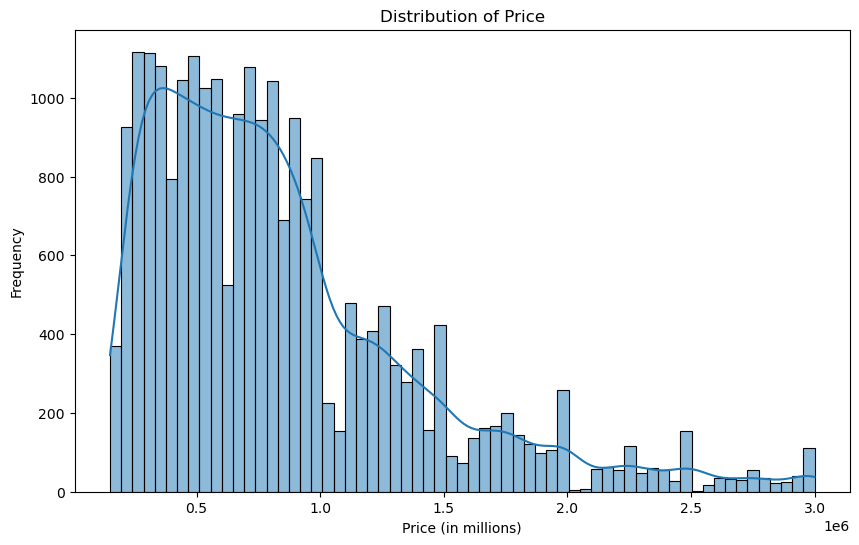

In [66]:
# Checking distribution of listed price
plt.figure(figsize=(10, 6))
sns.histplot(df6['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price (in millions)')
plt.ylabel('Frequency')
plt.show()


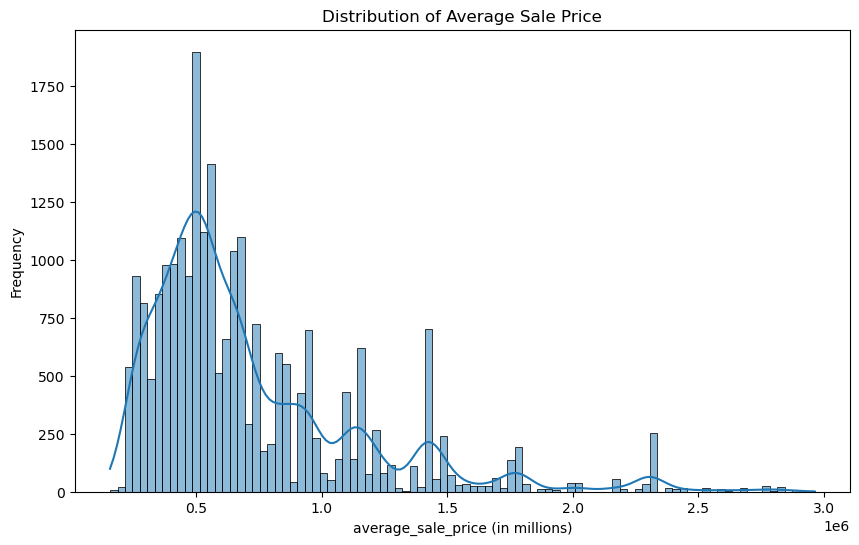

In [67]:
# Assuming your DataFrame is named 'data' and the 'price' column exists
plt.figure(figsize=(10, 6))
sns.histplot(df6['average_sale_price'], kde=True)
plt.title('Distribution of Average Sale Price')
plt.xlabel('average_sale_price (in millions)')
plt.ylabel('Frequency')
plt.show()

In [68]:
numeric_df = df6.select_dtypes(include=['int', 'float'])
skewness = numeric_df.skew()
print(skewness)

price                 1.434621
average_sale_price    1.787027
beds                  0.662789
baths                 0.961476
receptions            1.280359
Leasehold            -0.132278
Freehold              0.654361
Share of freehold     2.417722
Balcony               3.823819
Gym                   9.115647
Garden                6.151444
Garage                5.661118
school1               1.307215
school2               0.537564
station1             -0.439677
station2             -0.814246
latitude             -0.069084
longitude             0.219681
dtype: float64


In [69]:
# Apply logarithmic transformation to positively skewed data
df6['log_trans_avg_price'] = np.log1p(df6['average_sale_price'])
df6['log_trans_price'] = np.log1p(df6['price'])

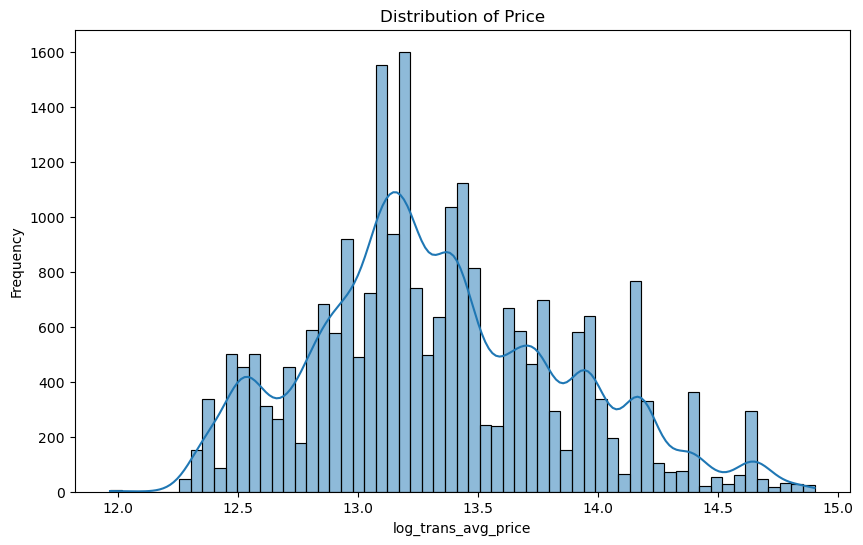

In [70]:
# Assuming your DataFrame is named 'data' and the 'price' column exists
plt.figure(figsize=(10, 6))
sns.histplot(df6['log_trans_avg_price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('log_trans_avg_price')
plt.ylabel('Frequency')
plt.show()

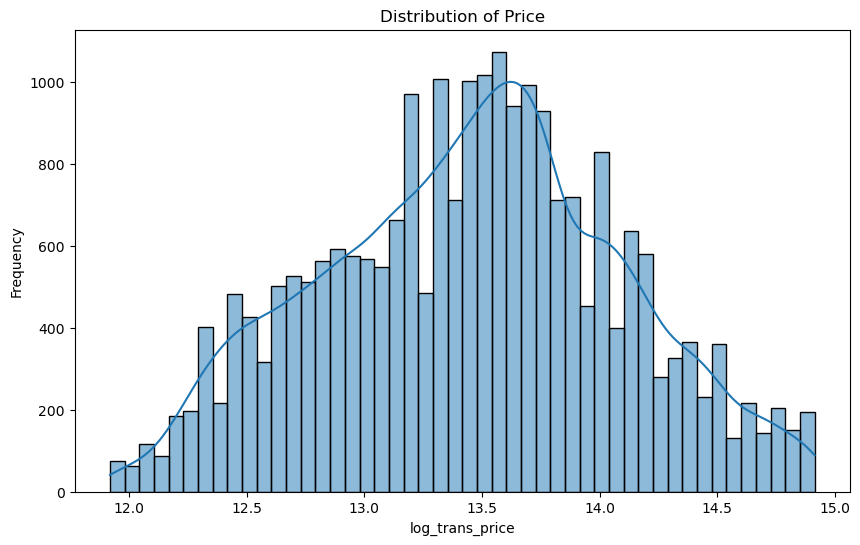

In [71]:
# Assuming your DataFrame is named 'data' and the 'price' column exists
plt.figure(figsize=(10, 6))
sns.histplot(df6['log_trans_price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('log_trans_price')
plt.ylabel('Frequency')
plt.show()

In [195]:
df6.columns

Index(['url', 'type', 'address', 'price', 'average_sale_price',
       'description_text', 'beds', 'baths', 'receptions', 'Leasehold',
       'Freehold', 'Share of freehold', 'Balcony', 'Gym', 'Garden', 'Garage',
       'school1', 'school2', 'station1', 'station2', 'latitude', 'longitude',
       'log_trans_avg_price', 'log_trans_price'],
      dtype='object')

In [198]:
df6[['log_trans_price', 'log_trans_avg_price']].describe()

,log_trans_price,log_trans_avg_price
count,23670.000000,23670.000000
mean,13.451001,13.331906
std,0.637399,0.526337
min,11.918397,11.967187
25%,12.994532,12.975197
50%,13.487008,13.250329
75%,13.906266,13.669432
max,14.914123,14.901544


In [72]:
numeric_df = df6.select_dtypes(include=['int', 'float'])
skewness = numeric_df.skew()
print(skewness)

price                  1.434621
average_sale_price     1.787027
beds                   0.662789
baths                  0.961476
receptions             1.280359
Leasehold             -0.132278
Freehold               0.654361
Share of freehold      2.417722
Balcony                3.823819
Gym                    9.115647
Garden                 6.151444
Garage                 5.661118
school1                1.307215
school2                0.537564
station1              -0.439677
station2              -0.814246
latitude              -0.069084
longitude              0.219681
log_trans_avg_price    0.398309
log_trans_price       -0.034039
dtype: float64


<Axes: ylabel='log_trans_avg_price'>

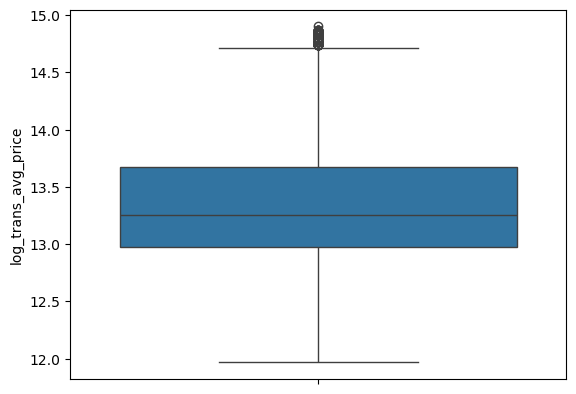

In [73]:
# Boxplot
sns.boxplot(df6['log_trans_avg_price'])


<Axes: ylabel='log_trans_price'>

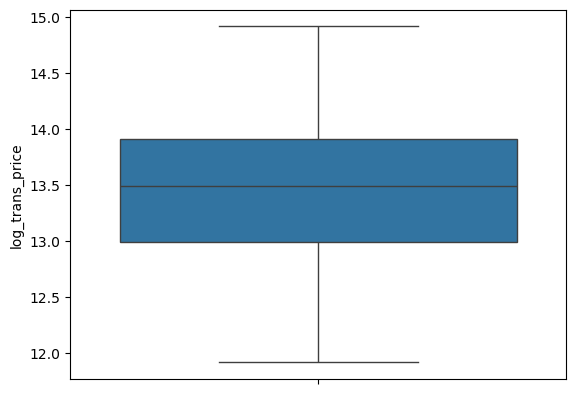

In [74]:
sns.boxplot(df6['log_trans_price'])

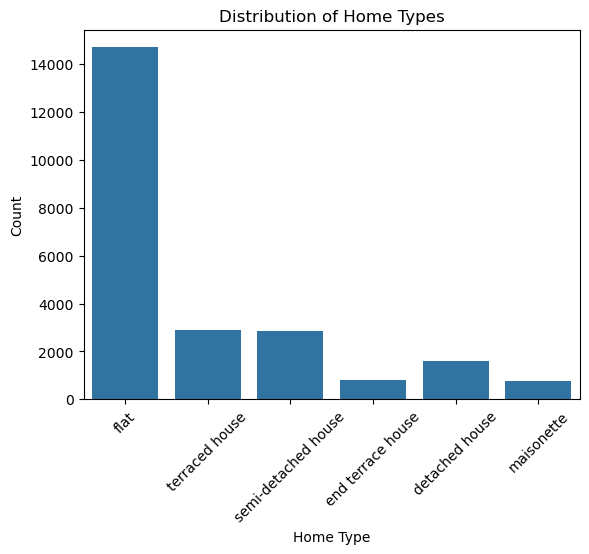

In [75]:
# Distribution of home types
sns.countplot(data=df6, x='type')
plt.title('Distribution of Home Types')
plt.xlabel('Home Type')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

In [76]:
df6['type'] = df6['type'].str.capitalize()
df6.head()

,url,type,address,price,average_sale_price,description_text,beds,baths,receptions,Leasehold,...,Garden,Garage,school1,school2,station1,station2,latitude,longitude,log_trans_avg_price,log_trans_price
0,https://www.zoopla.co.uk/for-sale/details/6648...,Flat,BR1,150000.0,338202.0,This 1 bedroom retirement flat on the ground f...,1,1,1,1,...,0,0,0.4,0.4,0.6,0.7,51.416240,0.005940,12.731402,11.918397
1,https://www.zoopla.co.uk/for-sale/details/6536...,Flat,BR1,150000.0,338202.0,A great opportunity to acquire this second flo...,1,1,1,1,...,0,0,0.3,0.4,0.1,0.4,51.408058,0.015874,12.731402,11.918397
2,https://www.zoopla.co.uk/for-sale/details/6534...,Flat,BR1,160000.0,338202.0,Jdm are delighted to offer to the market this ...,1,1,1,1,...,0,0,0.3,0.5,0.1,0.4,51.407821,0.015145,12.731402,11.982935
3,https://www.zoopla.co.uk/for-sale/details/6616...,Flat,BR1,180000.0,338202.0,***********************cash buyers only*******...,1,1,1,1,...,0,0,0.1,0.2,0.4,0.5,51.407081,0.026651,12.731402,12.100718
4,https://www.zoopla.co.uk/for-sale/details/6592...,Flat,BR1,200000.0,338202.0,"*guide price £200,000 - £215,000* A great oppo...",1,1,1,1,...,0,0,0.3,0.3,0.5,0.7,51.424659,-0.005706,12.731402,12.206078


In [77]:

# Applying One-Hot Encoding to the 'type' column
type_dummies = pd.get_dummies(df6.type).astype(int)

# Concatenate the new columns with the original DataFrame
df7 = pd.concat([df6, type_dummies], axis=1)

# Dropping the original 'type' column
df7.drop('type', axis=1, inplace=True)

# Display the first few rows of the modified DataFrame
df7.head()

,url,address,price,average_sale_price,description_text,beds,baths,receptions,Leasehold,Freehold,...,latitude,longitude,log_trans_avg_price,log_trans_price,Detached house,End terrace house,Flat,Maisonette,Semi-detached house,Terraced house
0,https://www.zoopla.co.uk/for-sale/details/6648...,BR1,150000.0,338202.0,This 1 bedroom retirement flat on the ground f...,1,1,1,1,0,...,51.416240,0.005940,12.731402,11.918397,0,0,1,0,0,0
1,https://www.zoopla.co.uk/for-sale/details/6536...,BR1,150000.0,338202.0,A great opportunity to acquire this second flo...,1,1,1,1,0,...,51.408058,0.015874,12.731402,11.918397,0,0,1,0,0,0
2,https://www.zoopla.co.uk/for-sale/details/6534...,BR1,160000.0,338202.0,Jdm are delighted to offer to the market this ...,1,1,1,1,0,...,51.407821,0.015145,12.731402,11.982935,0,0,1,0,0,0
3,https://www.zoopla.co.uk/for-sale/details/6616...,BR1,180000.0,338202.0,***********************cash buyers only*******...,1,1,1,1,0,...,51.407081,0.026651,12.731402,12.100718,0,0,1,0,0,0
4,https://www.zoopla.co.uk/for-sale/details/6592...,BR1,200000.0,338202.0,"*guide price £200,000 - £215,000* A great oppo...",1,1,1,1,0,...,51.424659,-0.005706,12.731402,12.206078,0,0,1,0,0,0


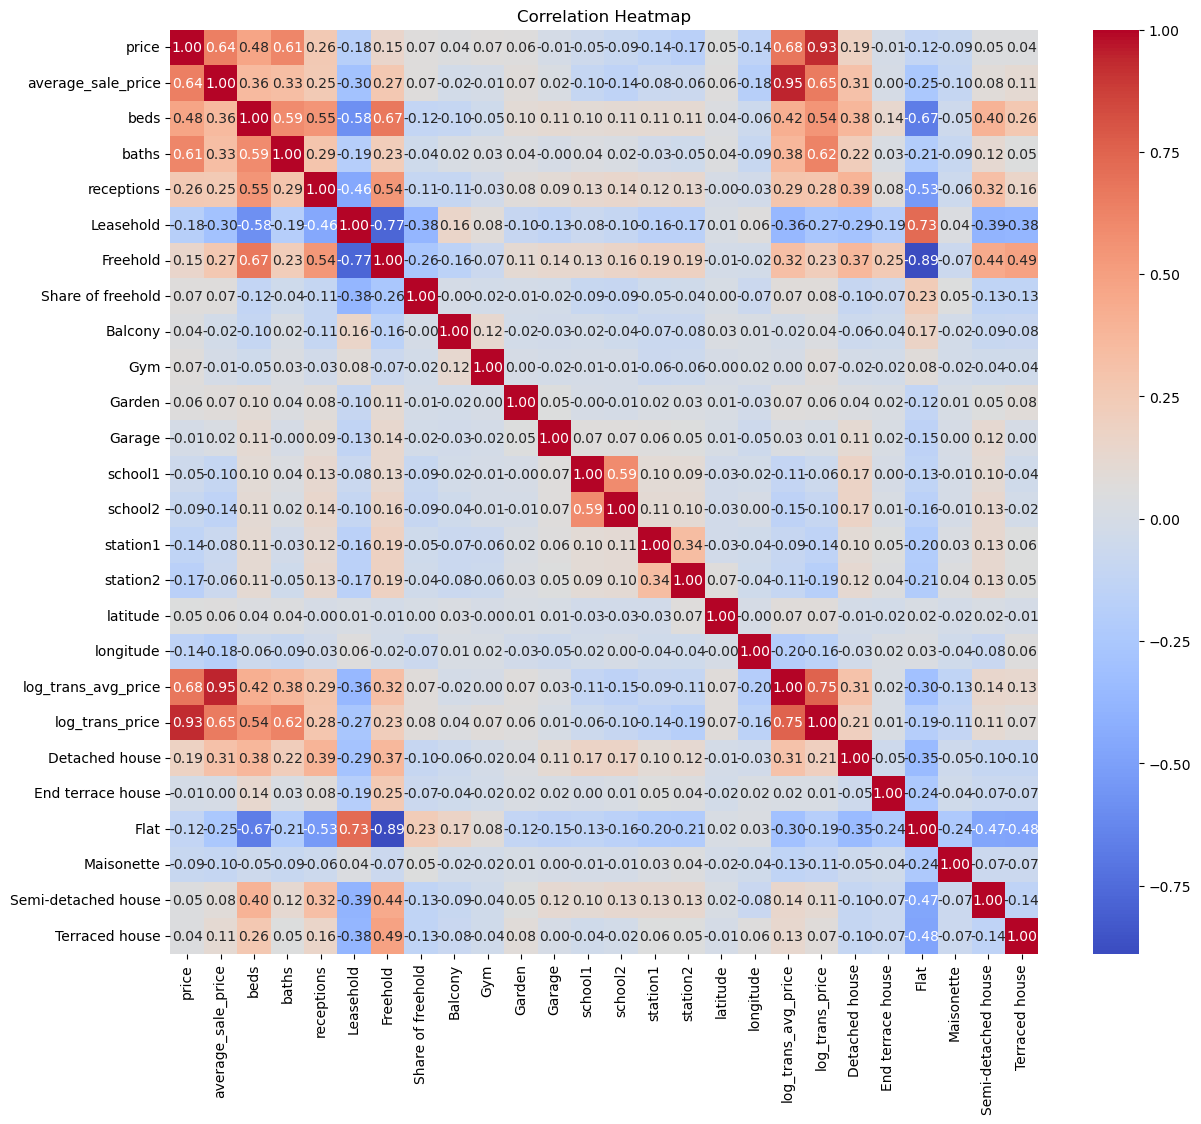

In [78]:
# heatmap
numeric_df = df7.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

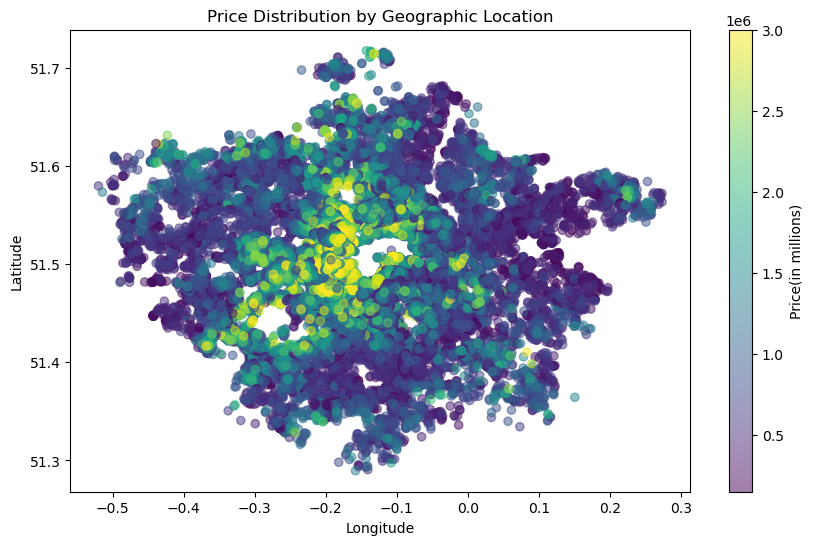

In [79]:
# Visualising distribution of listed price with location
plt.figure(figsize=(10, 6))
plt.scatter(df7['longitude'], df7['latitude'], c=df7['price'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Price(in millions)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price Distribution by Geographic Location')
plt.show()

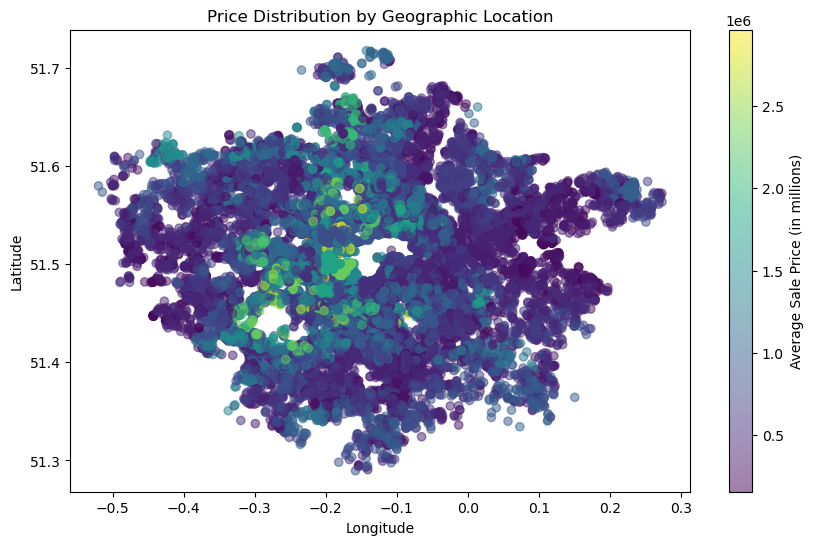

In [80]:
# Visualising distribution of average sale price with location
plt.figure(figsize=(10, 6))
plt.scatter(df7['longitude'], df7['latitude'], c=df7['average_sale_price'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Average Sale Price (in millions)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price Distribution by Geographic Location')
plt.show()


In [81]:
df8 = df7.copy()

In [82]:
numerical_columns = ['beds', 'baths', 'receptions']

# Normalising numerical features
scaler = MinMaxScaler()
df8[numerical_columns] = scaler.fit_transform(df8[numerical_columns])

# Normalising longitude and latitude
df8['longitude'] = df8['longitude'] * 0.01
df8['latitude'] = df8['latitude'] * 0.01

In [83]:
# Feature importance analysis when listed price is target variable
numerical_data = df8.select_dtypes(include=['int64', 'float64'])

numerical_features = numerical_data.drop(['average_sale_price', 'price', 'log_trans_avg_price','log_trans_price'], axis=1)

target = df8['log_trans_price']

selector = SelectKBest(score_func= f_regression, k='all')
selector.fit(numerical_features, target)

# Get the scores and column names
scores = selector.scores_

columns = numerical_features.columns

# Creating a DataFrame for the feature scores
feature_scores = pd.DataFrame({'Feature': columns, 'Score': scores})

# Sorting the DataFrame by score in descending order
sorted_features = feature_scores.sort_values(by='Score', ascending=False)
sorted_features

,Feature,Score
1,baths,15114.288515
0,beds,9996.043242
2,receptions,2003.913161
3,Leasehold,1822.582568
4,Freehold,1266.096194
13,station2,857.889355
15,longitude,588.675295
12,station1,491.429551
11,school2,218.981345
5,Share of freehold,143.912630


In [84]:
# Feature importance analysis when average sale price is target variable
numerical_data = df8.select_dtypes(include=['int64', 'float64'])

# Dropping non-feature columns (like 'price' if it's the target variable)
numerical_features = numerical_data.drop(['average_sale_price', 'price', 'log_trans_avg_price','log_trans_price'], axis=1)

target = df8['log_trans_avg_price']

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(numerical_features, target)

# Get the scores and column names
scores = selector.scores_
columns = numerical_features.columns

# Creating a DataFrame for the feature scores
feature_scores = pd.DataFrame({'Feature': columns, 'Score': scores})

# Sorting the DataFrame by score in descending order
sorted_features = feature_scores.sort_values(by='Score', ascending=False)
sorted_features

,Feature,Score
0,beds,5162.446110
1,baths,3903.828004
3,Leasehold,3470.456076
4,Freehold,2795.102438
2,receptions,2094.301857
15,longitude,999.924606
11,school2,537.660317
10,school1,295.285416
13,station2,269.687255
12,station1,214.487773


In [85]:
df8.shape

(23670, 29)

In [86]:
df8.head()

,url,address,price,average_sale_price,description_text,beds,baths,receptions,Leasehold,Freehold,...,latitude,longitude,log_trans_avg_price,log_trans_price,Detached house,End terrace house,Flat,Maisonette,Semi-detached house,Terraced house
0,https://www.zoopla.co.uk/for-sale/details/6648...,BR1,150000.0,338202.0,This 1 bedroom retirement flat on the ground f...,0.0,0.0,0.166667,1,0,...,0.514162,0.000059,12.731402,11.918397,0,0,1,0,0,0
1,https://www.zoopla.co.uk/for-sale/details/6536...,BR1,150000.0,338202.0,A great opportunity to acquire this second flo...,0.0,0.0,0.166667,1,0,...,0.514081,0.000159,12.731402,11.918397,0,0,1,0,0,0
2,https://www.zoopla.co.uk/for-sale/details/6534...,BR1,160000.0,338202.0,Jdm are delighted to offer to the market this ...,0.0,0.0,0.166667,1,0,...,0.514078,0.000151,12.731402,11.982935,0,0,1,0,0,0
3,https://www.zoopla.co.uk/for-sale/details/6616...,BR1,180000.0,338202.0,***********************cash buyers only*******...,0.0,0.0,0.166667,1,0,...,0.514071,0.000267,12.731402,12.100718,0,0,1,0,0,0
4,https://www.zoopla.co.uk/for-sale/details/6592...,BR1,200000.0,338202.0,"*guide price £200,000 - £215,000* A great oppo...",0.0,0.0,0.166667,1,0,...,0.514247,-0.000057,12.731402,12.206078,0,0,1,0,0,0


In [87]:
df8.columns

Index(['url', 'address', 'price', 'average_sale_price', 'description_text',
       'beds', 'baths', 'receptions', 'Leasehold', 'Freehold',
       'Share of freehold', 'Balcony', 'Gym', 'Garden', 'Garage', 'school1',
       'school2', 'station1', 'station2', 'latitude', 'longitude',
       'log_trans_avg_price', 'log_trans_price', 'Detached house',
       'End terrace house', 'Flat', 'Maisonette', 'Semi-detached house',
       'Terraced house'],
      dtype='object')

In [88]:
df8 = df8.reset_index(drop=True)

Descriptions cleaning

In [89]:
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Replace special characters
    text = text.replace(u'\xa0', u' ')

    # Clean specific patterns
    text = treat_GBP(text)
    text = treat_m2(text)
    text = filter_phone_numbers(text)
    text = filter_emails(text)
    text = filter_ibans(text)
    text = filter_ref(text)
    text = filter_websites(text)
    text = remove_space_between_numbers(text)

    return text

def treat_GBP(text):
    text = re.sub(r'(gbp[^s])|(gbp)|(£)', ' gbp', text)
    return text

def treat_m2(text):
    text = re.sub(r'(m2)|(m²)', ' m²', text)
    return text

def filter_ibans(text):
    pattern = r'fr\d{2}[ ]\d{4}[ ]\d{4}[ ]\d{4}[ ]\d{4}[ ]\d{2}|fr\d{20}|fr[ ]\d{2}[ ]\d{3}[ ]\d{3}[ ]\d{3}[ ]\d{5}'
    text = re.sub(pattern, '', text)
    return text

def remove_space_between_numbers(text):
    text = re.sub(r'(\d)\s+(\d)', r'\1\2', text)
    return text

def filter_emails(text):
    pattern = r'(?:(?!.*?[.]{2})[a-zA-Z0-9](?:[a-zA-Z0-9.+!%-]{1,64}|)|\"[a-zA-Z0-9.+!% -]{1,64}\")@[a-zA-Z0-9][a-zA-Z0-9.-]+(.[a-z]{2,}|.[0-9]{1,})'
    text = re.sub(pattern, '', text)
    return text

def filter_ref(text):
    pattern = r'(\(*)(ref|réf)(\.|[ ])\d+(\)*)'
    text = re.sub(pattern, '', text)
    return text

def filter_websites(text):
    pattern = r'(http\:\/\/|https\:\/\/)?([a-z0-9][a-z0-9\-]*\.)+[a-z][a-z\-]*'
    text = re.sub(pattern, '', text)
    return text

def filter_phone_numbers(text):
    pattern = r'(?:(?:\+|00)33[\s.-]{0,3}(?:\(0\)[\s.-]{0,3})?|0)[1-9](?:(?:[\s.-]?\d{2}){4}|\d{2}(?:[\s.-]?\d{3}){2})|(\d{2}[ ]\d{2}[ ]\d{3}[ ]\d{3})'
    text = re.sub(pattern, '', text)
    return text

df8['description_text'] = df8.description_text.apply(clean_text)


In [91]:
df8['description_text']

0        this 1 bedroom retirement flat on the ground f...
1        a great opportunity to acquire this second flo...
2        jdm are delighted to offer to the market this ...
3        ***********************cash buyers only*******...
4        *guide price  gbp200,000 -  gbp215,000* a grea...
                               ...                        
23665    this elegant two-bedroom, two-bathroom first f...
23666    upon entering this beautiful penthouse via its...
23667    a wonderful two bedroom two bathroom apartment...
23668    a fantastic five bedroom semi-detached house o...
23669    this gorgeous 5 bed detached house in wembley ...
Name: description_text, Length: 23670, dtype: object

In [92]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mm8778k\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mm8778k\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [93]:
tokeniser = RegexpTokenizer(r'\w+')
lemmatiser = WordNetLemmatizer()

stopwords_nltk=stopwords.words('english')
real_estate_stopwords = ["area", "flat", "house", "gbp", "province", "location", "plot", "hectare", "acre", "m²", "m2", "sq", "sale", "square", "meter", "metre", "feet", "ft", "sqft", "foot", "room", "bedroom", "bathroom", "bath", "washroom", "dining", "living", "kitchen", "hallway", "corridor", "extra"]
stop_words=stopwords_nltk+real_estate_stopwords

def advanced_preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove single alphabets
    text = re.sub(r'\b\w{1}\b', '', text)
    # Replace multiple spaces with one
    text = re.sub(r'\s+', ' ', text)
    # Tokenize text using the tokenizer
    tokens = tokeniser.tokenize(text)
    # Lemmatising text
    lemmatised = [lemmatiser.lemmatize(str(token)) for token in tokens]
    # Remove Stop words
    clean_text = [token for token in lemmatised if token not in stop_words]
    return ' '.join(clean_text)

# Preprocess text data
df8['desc_text_advanced_processed'] = df8['description_text'].apply(advanced_preprocess_text)

In [94]:
df8['desc_text_advanced_processed']

0        retirement ground floor feature wellsized rece...
1        great opportunity acquire second floor retirem...
2        jdm delighted offer market one retirement prop...
3        cash buyer delighted offer market ground floor...
4        guide price great opportunity purchase superb ...
                               ...                        
23665    elegant twobedroom twobathroom first floor apa...
23666    upon entering beautiful penthouse via direct l...
23667    wonderful two two apartment offering spacious ...
23668    fantastic five semidetached doorstep amenity b...
23669    gorgeous bed detached wembley boast rustic dec...
Name: desc_text_advanced_processed, Length: 23670, dtype: object

In [95]:
#check 1 grams
totalWords = list(" ".join(df8['desc_text_advanced_processed']).split(" "))

(pd.Series(nltk.ngrams(totalWords, 1)).value_counts())[:50]

(property,)      40605
(floor,)         32669
(garden,)        28281
(double,)        26234
(space,)         24087
(station,)       23449
(two,)           21836
(apartment,)     19543
(offer,)         18952
(ha,)            18473
(access,)        17229
(road,)          16948
(located,)       16789
(within,)        16638
(home,)          16066
(london,)        15745
(park,)          15619
(rear,)          15578
(family,)        15274
(service,)       15044
(window,)        14950
(also,)          14914
(large,)         13875
(well,)          13183
(ground,)        12947
(reception,)     12789
(one,)           12432
(spacious,)      12301
(street,)        12217
(private,)       12159
(modern,)        11766
(benefit,)       11608
(parking,)       11304
(door,)          10937
(three,)         10835
(storage,)       10833
(local,)         10747
(fitted,)        10700
(open,)          10684
(shop,)          10672
(first,)         10626
(school,)        10561
(front,)         10527
(situated,)

In [96]:
#check 2 grams
(pd.Series(nltk.ngrams(totalWords, 2)).value_counts())[:20]

(double, glazed)          8466
(first, floor)            7756
(ground, floor)           7542
(rear, garden)            6671
(council, tax)            5766
(glazed, window)          5647
(transport, link)         5475
(open, plan)              5305
(tax, band)               5072
(two, double)             4289
(service, charge)         4251
(family, home)            3918
(easy, access)            3784
(high, street)            3702
(ground, rent)            3685
(walking, distance)       3546
(natural, light)          3474
(property, ha)            3412
(short, walk)             3398
(underground, station)    3312
Name: count, dtype: int64

In [97]:
#check 3 grams
(pd.Series(nltk.ngrams(totalWords, 3)).value_counts())[:20]

(double, glazed, window)          5458
(council, tax, band)              4870
(within, easy, reach)             2281
(within, walking, distance)       2275
(glazed, window, rear)            1626
(please, use, reference)          1490
(part, offer, contract)           1484
(wash, hand, basin)               1453
(excellent, transport, link)      1335
(form, part, offer)               1325
(glazed, window, front)           1320
(gas, central, heating)           1291
(use, reference, chpk)            1254
(chpk, contacting, foxtons)       1254
(reference, chpk, contacting)     1254
(short, walk, away)               1244
(shop, bar, restaurant)           1186
(within, close, proximity)        1113
(viewing, highly, recommended)    1110
(wall, base, unit)                 977
Name: count, dtype: int64

In [173]:
# Generating TF-IDF features with n-grams
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,3), max_features=1000)
tfidf_matrix_advanced = vectorizer.fit_transform(df8['desc_text_advanced_processed'])

# Create DataFrame with TF-IDF features
tfidf_df_processed = pd.DataFrame(tfidf_matrix_advanced.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df_processed.head()

,abundance,access,accessed,accessible,accommodation,accommodation comprises,accordingly,accuracy,accurate,accurate reliable,...,working,worktops,world,would,year,year remaining,youll,youll find,youre,zone
0,0.000000,0.081128,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.100503,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.121506,0.0,0.0,0.0,0.0,0.0
3,0.118501,0.000000,0.000000,0.0,0.082841,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.047193,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.033848,0.0,0.0,0.0,0.0,0.0


In [174]:
tfidf_df_processed.head()

,abundance,access,accessed,accessible,accommodation,accommodation comprises,accordingly,accuracy,accurate,accurate reliable,...,working,worktops,world,would,year,year remaining,youll,youll find,youre,zone
0,0.000000,0.081128,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.100503,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.121506,0.0,0.0,0.0,0.0,0.0
3,0.118501,0.000000,0.000000,0.0,0.082841,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.047193,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.033848,0.0,0.0,0.0,0.0,0.0


In [175]:
tfidf_df_processed.describe()

,abundance,access,accessed,accessible,accommodation,accommodation comprises,accordingly,accuracy,accurate,accurate reliable,...,working,worktops,world,would,year,year remaining,youll,youll find,youre,zone
count,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,...,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000,23670.000000
mean,0.006362,0.031625,0.004510,0.005245,0.015679,0.005275,0.003926,0.003695,0.003276,0.002776,...,0.004349,0.003054,0.003901,0.007886,0.018525,0.005723,0.006442,0.003018,0.003190,0.005096
std,0.026898,0.041433,0.023564,0.024942,0.035768,0.025574,0.023412,0.022077,0.015278,0.014130,...,0.020188,0.017856,0.023278,0.028494,0.042610,0.023764,0.035183,0.020328,0.022445,0.026129
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.057383,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.324392,0.320084,0.316106,0.328540,0.298199,0.334246,0.176656,0.313070,0.184556,0.151937,...,0.331950,0.259078,0.495313,0.374538,0.475491,0.257201,0.530457,0.382450,0.599256,0.466182


In [101]:
# from sklearn.decomposition import PCA
# # Assume you have already trained the PCA model
# pca = PCA(n_components=100)
# pca.fit(tfidf_df_processed)

# # # Save the PCA model to disk
# # joblib.dump(pca, 'pca_model.pkl')

# # # Load the PCA model from disk
# # pca_loaded = joblib.load('pca_model.pkl')

# # Now you can use the loaded PCA model for validation or further analysis
# transformed_data = pca.transform(tfidf_df_processed)
# transformed_data

In [144]:
df9 = df8.drop(['description_text', 'desc_text_advanced_processed'], axis=1)

In [145]:
numerical_features = df9.copy()

In [146]:
numerical_features.shape

(23670, 28)

In [147]:
numerical_features = numerical_features.drop(columns=['log_trans_price' ,'address','log_trans_avg_price','average_sale_price', 'price', 'url'])

In [148]:
numerical_features.columns

Index(['beds', 'baths', 'receptions', 'Leasehold', 'Freehold',
       'Share of freehold', 'Balcony', 'Gym', 'Garden', 'Garage', 'school1',
       'school2', 'station1', 'station2', 'latitude', 'longitude',
       'Detached house', 'End terrace house', 'Flat', 'Maisonette',
       'Semi-detached house', 'Terraced house'],
      dtype='object')

In [176]:
numerical_features.reset_index(drop=True, inplace=True)
tfidf_df_processed.reset_index(drop=True, inplace=True)

In [177]:
# Concatenating the TF-IDF vectors other numerical features
combined_features = pd.concat([numerical_features, tfidf_df_processed], axis=1)
combined_features.shape

(23670, 1022)

# **When target price is Listed  Price**

In [178]:
y = df8.log_trans_price

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(combined_features, y, test_size=0.2, shuffle=True,random_state=42)

In [126]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score


# **Random forest**

In [164]:
params = {
    'n_estimators': 200, # Number of trees in the forest
    'max_features': 'sqrt',  # Number of features to consider when looking for the best split ( randomness and reduces correlation among trees)
    'max_depth': None, # Maximum depth of the trees (Controls the complexity)
    'bootstrap': False # Whether bootstrap samples should be used (Helps introduce randomness and diversity among the trees)
}

rf = RandomForestRegressor(**params)
rf = rf.fit(X_train, y_train)
# Make predictions on training and test sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate RMSE and R-squared for training and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

Train RMSE: 0.0063758770577229005
Test RMSE: 0.28897339386447973
Train R-squared: 0.9999005273862022
Test R-squared: 0.7894060642248394


In [130]:
y_pred = rf.predict(X_test)

# Apply the inverse transformation to obtain the predictions in the original scale
y_pred_original_scale = np.expm1(y_pred)

# Similarly, apply the inverse transformation to the true target values (y_test)
y_test_original_scale = np.expm1(y_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_original_scale))

print('RMSE: ', rmse)

RMSE:  340395.5701098772
MAE:  203912.98208042345


# **CBR**

In [180]:
# Define parameters for CatBoostRegressor
params = {
    'subsample': 0.9,        # Subsample ratio of the training instances
    'learning_rate': 0.2,    # Learning rate for gradient boosting
    'l2_leaf_reg': 7,        # L2 regularization term on weights
    'iterations': 200,       # Number of boosting iterations
    'depth': 8               # Depth of the trees
}

CBR = CatBoostRegressor(**params)

# Train the model using your training data
CBR.fit(X_train, y_train)

# Make predictions on training and test sets
y_train_pred = CBR.predict(X_train)
y_test_pred = CBR.predict(X_test)

# Calculate RMSE and R-squared for training and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

0:	learn: 0.5665956	total: 110ms	remaining: 21.8s
1:	learn: 0.5066731	total: 202ms	remaining: 20s
2:	learn: 0.4637795	total: 292ms	remaining: 19.1s
3:	learn: 0.4330948	total: 384ms	remaining: 18.8s
4:	learn: 0.4011317	total: 471ms	remaining: 18.4s
5:	learn: 0.3728187	total: 558ms	remaining: 18s
6:	learn: 0.3560544	total: 645ms	remaining: 17.8s
7:	learn: 0.3426790	total: 733ms	remaining: 17.6s
8:	learn: 0.3274297	total: 821ms	remaining: 17.4s
9:	learn: 0.3156698	total: 909ms	remaining: 17.3s
10:	learn: 0.3069297	total: 999ms	remaining: 17.2s
11:	learn: 0.3008508	total: 1.09s	remaining: 17.1s
12:	learn: 0.2954894	total: 1.18s	remaining: 16.9s
13:	learn: 0.2889032	total: 1.27s	remaining: 16.8s
14:	learn: 0.2833109	total: 1.35s	remaining: 16.7s
15:	learn: 0.2798956	total: 1.44s	remaining: 16.6s
16:	learn: 0.2769887	total: 1.54s	remaining: 16.5s
17:	learn: 0.2746444	total: 1.63s	remaining: 16.5s
18:	learn: 0.2722803	total: 1.72s	remaining: 16.4s
19:	learn: 0.2698918	total: 1.81s	remaining: 

In [181]:
y_pred = CBR.predict(X_test)

# Apply the inverse transformation to obtain the predictions in the original scale
y_pred_original_scale = np.expm1(y_pred)

# Similarly, apply the inverse transformation to the true target values (y_test)
y_test_original_scale = np.expm1(y_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_original_scale))

print('RMSE: ', rmse)

RMSE:  247979.94691109142


In [136]:
# import pickle
# with open('catboost_tfidf_model.pkl', 'wb') as f:
#     pickle.dump(CBR, f)

# **XGBR**

In [182]:
params = {
    'tree_method': 'auto',  # Method to use for constructing trees
     'subsample': 0.7,  # Fraction of samples used for tree building
     'n_estimators': 350, # Number of boosting rounds
     'max_depth': 8, # Maximum depth of trees
     'learning_rate': 0.05, # Learning rate
     'device': 'cuda',  # Specify GPU usage if available
     'eval_metric':'rmse'   # Specify the regression objective
}

XGB = XGBRegressor(**params)

XGB = XGB.fit(X_train, y_train)
# Make predictions on training and test sets
y_train_pred = XGB.predict(X_train)
y_test_pred = XGB.predict(X_test)

# Calculate RMSE and R-squared for training and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

Train RMSE: 0.12022816736423206
Test RMSE: 0.2221692371953939
Train R-squared: 0.9646299139948041
Test R-squared: 0.8755204551063728


In [183]:
y_pred = XGB.predict(X_test)

# Apply the inverse transformation to obtain the predictions in the original scale
y_pred_original_scale = np.expm1(y_pred)

# Similarly, apply the inverse transformation to the true target values (y_test)
y_test_original_scale = np.expm1(y_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_original_scale, y_pred_original_scale))

print('RMSE: ', rmse)


RMSE:  251690.0200317387


**Hyperparameters Tuning using RandomSearchCV numerical features**

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(numerical_features,y,test_size=0.2, shuffle=True,random_state=42)

In [113]:
from sklearn.model_selection import RandomizedSearchCV

In [114]:
# Define Random Forest regressor
rf_model = RandomForestRegressor()

# Define hyperparameters manually
param_dist = {
    'bootstrap': [True, False],    
    'n_estimators': [50 ,100, 150, 200, 250, 300],      # Number of trees in the forest
    'max_depth': [None, 5, 10, 15, 20],        # Maximum depth of the trees
    'max_features' : ['auto', 'sqrt']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model, param_distributions=param_dist, n_iter=30, scoring='neg_mean_squared_error', cv=5, verbose=2
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Best score
print("Best score found: ", np.sqrt(-random_search.best_score_))

# Evaluate model on test set
best_model = random_search.best_estimator_


best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score on test set: ", r2)

test_rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
print("Test RMSE: ", test_rmse)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=250; total time=   3.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=250; total time=   3.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=250; total time=   3.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=250; total time=   3.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, n_estimators=25

c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
65 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\base.py", line 666, in _valida

Best parameters found:  {'n_estimators': 250, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best score found:  0.2536127160939444
R-squared score on test set:  0.8454600804394273
Test RMSE:  0.2475456328022151


In [115]:
# Define XGBoost regressor
xgb_model = XGBRegressor()

# Define hyperparameters manually
param_dist = {
    'tree_method': ['auto'],
    'device': ['cuda'],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],       # Learning rate
    'n_estimators': [100, 150, 200, 250, 300, 350],             # Number of boosting rounds
    'max_depth': [4, 6, 8, 10, 12],                  # Maximum depth of trees
    'subsample': [0.6 ,0.7, 0.8, 0.9, 1.0, 1.2],            # Fraction of samples used for tree building
    'eval_metric': ['rmse']   # Specify the regression objective
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model, param_distributions=param_dist, n_iter=30, scoring='neg_mean_squared_error', cv=5, verbose=2
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Best score
print("Best score found: ", np.sqrt(-random_search.best_score_))

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score on test set: ", r2)

test_rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
print("Test RMSE: ", test_rmse)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\xgboost\core.py:160: UserWarning: [13:26:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[CV] END device=cuda, eval_metric=rmse, learning_rate=0.2, max_depth=8, n_estimators=350, subsample=0.6, tree_method=auto; total time=   1.4s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.2, max_depth=8, n_estimators=350, subsample=0.6, tree_method=auto; total time=   1.2s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.2, max_depth=8, n_estimators=350, subsample=0.6, tree_method=auto; total time=   1.2s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.2, max_depth=8, n_estimators=350, subsample=0.6, tree_method=auto; total time=   1.3s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.2, max_depth=8, n_estimators=350, subsample=0.6, tree_method=auto; total time=   1.2s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.5, max_depth=6, n_estimators=300, subsample=1.0, tree_method=auto; total time=   0.6s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.5, max_depth=6, n_estimators=300, subsample=1.0, tree_method=auto; total time=   0.6s
[CV] E

c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\xgboost\sklearn.py", line 1090, in fit
    sel

Best parameters found:  {'tree_method': 'auto', 'subsample': 0.9, 'n_estimators': 350, 'max_depth': 8, 'learning_rate': 0.1, 'eval_metric': 'rmse', 'device': 'cuda'}
Best score found:  0.22923975660022097
R-squared score on test set:  0.8742483422221072
Test RMSE:  0.2233015756408434


In [116]:
# Define CatBoost regressor
catboost_model = CatBoostRegressor()

# Define hyperparameters manually
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],       # Learning rate
    'iterations': [100, 150, 200, 250],                # Number of boosting iterations
    'depth': [4, 6, 8, 10],                            # Depth of the trees
    'l2_leaf_reg': [1, 3, 5, 7, 9],                    # L2 regularization coefficient
    'subsample': [0.7, 0.8, 0.9, 1.0],                 # Fraction of samples used for tree building

   
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=catboost_model, param_distributions=param_dist, n_iter=30, scoring='neg_mean_squared_error', cv=5, verbose=2
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train, verbose=False)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Best score
print("Best score found: ", np.sqrt(-random_search.best_score_))

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score on test set: ", r2)

test_rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
print("Test RMSE: ", test_rmse)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END depth=8, iterations=150, l2_leaf_reg=9, learning_rate=0.1, subsample=0.8; total time=   0.6s
[CV] END depth=8, iterations=150, l2_leaf_reg=9, learning_rate=0.1, subsample=0.8; total time=   0.4s
[CV] END depth=8, iterations=150, l2_leaf_reg=9, learning_rate=0.1, subsample=0.8; total time=   0.4s
[CV] END depth=8, iterations=150, l2_leaf_reg=9, learning_rate=0.1, subsample=0.8; total time=   0.4s
[CV] END depth=8, iterations=150, l2_leaf_reg=9, learning_rate=0.1, subsample=0.8; total time=   0.4s
[CV] END depth=10, iterations=250, l2_leaf_reg=9, learning_rate=0.1, subsample=0.8; total time=   2.1s
[CV] END depth=10, iterations=250, l2_leaf_reg=9, learning_rate=0.1, subsample=0.8; total time=   2.1s
[CV] END depth=10, iterations=250, l2_leaf_reg=9, learning_rate=0.1, subsample=0.8; total time=   2.2s
[CV] END depth=10, iterations=250, l2_leaf_reg=9, learning_rate=0.1, subsample=0.8; total time=   2.1s
[CV] END depth=1

**Hyperparameters Tuning using RandomSearchCV all features**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(combined_features, y, test_size=0.2, shuffle=True,random_state=42)

In [124]:
# Define Random Forest regressor
rf_model = RandomForestRegressor()


param_dist = {
    'bootstrap': [True, False],    
    'n_estimators': [50 ,100, 150, 200, 250],      # Number of trees in the forest
    'max_depth': [None, 5, 10, 15, 20],        # Maximum depth of the trees
    'max_features' : ['auto', 'sqrt']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model, param_distributions=param_dist, n_iter=30, scoring='neg_mean_squared_error', cv=5, verbose=2
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Best score
print("Best score found: ", np.sqrt(-random_search.best_score_))

# Evaluate model on test set
best_model = random_search.best_estimator_


best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score on test set: ", r2)

test_rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
print("Test RMSE: ", test_rmse)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, n_estimators=100; total time=   9.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, n_estimators=100; total time=   9.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, n_estimators=100; total time=   9.7s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, n_estimators=100; total time=   9.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, n_estimators=10

c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\base.py", line 666, in _valida

Best parameters found:  {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best score found:  0.29447540448602455
R-squared score on test set:  0.7889599325300538
Test RMSE:  0.2892793190662603


In [165]:
# Define XGBoost regressor
xgb_model = XGBRegressor()

# Define hyperparameters manually
param_dist = {
    'tree_method': ['auto'],
    'device': ['cuda'],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],       # Learning rate
    'n_estimators': [100, 150, 200, 250, 300, 350],             # Number of boosting rounds
    'max_depth': [4, 6, 8, 10, 12],                  # Maximum depth of trees
    'subsample': [0.6 ,0.7, 0.8, 0.9, 1.0, 1.2],            # Fraction of samples used for tree building
    'eval_metric': ['rmse']   # Specify the regression objective
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model, param_distributions=param_dist, n_iter=30, scoring='neg_mean_squared_error', cv=5, verbose=2
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Best score
print("Best score found: ", np.sqrt(-random_search.best_score_))

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score on test set: ", r2)

test_rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
print("Test RMSE: ", test_rmse)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.01, max_depth=4, n_estimators=250, subsample=0.7, tree_method=auto; total time=   2.8s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.01, max_depth=4, n_estimators=250, subsample=0.7, tree_method=auto; total time=   2.7s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.01, max_depth=4, n_estimators=250, subsample=0.7, tree_method=auto; total time=   2.5s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.01, max_depth=4, n_estimators=250, subsample=0.7, tree_method=auto; total time=   2.6s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.01, max_depth=4, n_estimators=250, subsample=0.7, tree_method=auto; total time=   2.6s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.1, max_depth=6, n_estimators=350, subsample=0.7, tree_method=auto; total time=   4.5s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.1, max_depth=6, n_estimat

c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
15 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\xgboost\sklearn.py", line 1090, in fit
    sel

Best parameters found:  {'tree_method': 'auto', 'subsample': 0.7, 'n_estimators': 350, 'max_depth': 8, 'learning_rate': 0.05, 'eval_metric': 'rmse', 'device': 'cuda'}
Best score found:  0.22749464324303476
R-squared score on test set:  0.8755204551063728
Test RMSE:  0.2221692371953939


In [133]:
# Define CatBoost regressor
catboost_model = CatBoostRegressor()


param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],       # Learning rate
    'iterations': [100, 150, 200, 250],                # Number of boosting iterations
    'depth': [4, 6, 8, 10],                            # Depth of the trees
    'l2_leaf_reg': [1, 3, 5, 7, 9],                    # L2 regularization coefficient
    'subsample': [0.7, 0.8, 0.9, 1.0],                 # Fraction of samples used for tree building

   
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=catboost_model, param_distributions=param_dist, n_iter=30, scoring='neg_mean_squared_error', cv=5, verbose=2
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train, verbose=False)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Best score
print("Best score found: ", np.sqrt(-random_search.best_score_))

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score on test set: ", r2)

test_rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
print("Test RMSE: ", test_rmse)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END depth=4, iterations=150, l2_leaf_reg=9, learning_rate=0.5, subsample=0.7; total time=   1.8s
[CV] END depth=4, iterations=150, l2_leaf_reg=9, learning_rate=0.5, subsample=0.7; total time=   1.6s
[CV] END depth=4, iterations=150, l2_leaf_reg=9, learning_rate=0.5, subsample=0.7; total time=   1.5s
[CV] END depth=4, iterations=150, l2_leaf_reg=9, learning_rate=0.5, subsample=0.7; total time=   1.5s
[CV] END depth=4, iterations=150, l2_leaf_reg=9, learning_rate=0.5, subsample=0.7; total time=   1.5s
[CV] END depth=4, iterations=200, l2_leaf_reg=9, learning_rate=0.1, subsample=0.8; total time=   2.2s
[CV] END depth=4, iterations=200, l2_leaf_reg=9, learning_rate=0.1, subsample=0.8; total time=   2.5s
[CV] END depth=4, iterations=200, l2_leaf_reg=9, learning_rate=0.1, subsample=0.8; total time=   2.1s
[CV] END depth=4, iterations=200, l2_leaf_reg=9, learning_rate=0.1, subsample=0.8; total time=   2.1s
[CV] END depth=4, it

# **When target variable is Average sale  Price**

In [190]:
y = df8.log_trans_avg_price

**Only numerical features**

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(numerical_features, y, test_size=0.2, shuffle=True,random_state=42)

In [192]:
# Define Random Forest regressor
rf_model = RandomForestRegressor()


param_dist = {
    'bootstrap': [True, False],    
    'n_estimators': [50 ,100, 150, 200, 250, 300],      # Number of trees in the forest
    'max_depth': [None, 5, 10, 15, 20],        # Maximum depth of the trees
    'max_features' : ['auto', 'sqrt']
}

# Initialise RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model, param_distributions=param_dist, n_iter=30, scoring='neg_mean_squared_error', cv=5, verbose=2
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Best score
print("Best score found: ", np.sqrt(-random_search.best_score_))

# Evaluate model on test set
best_model = random_search.best_estimator_


best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score on test set: ", r2)

test_rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
print("Test RMSE: ", test_rmse)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=20, max_features=auto, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, n_estimators=250; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, n_estimators=300; total time= 

c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\base.py", line 666, in _valida

Best parameters found:  {'n_estimators': 150, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best score found:  0.15894951142532793
R-squared score on test set:  0.9076575326767063
Test RMSE:  0.16055285487104157


In [193]:
# Define XGBoost regressor
xgb_model = XGBRegressor()


param_dist = {
    'tree_method': ['auto'],
    'device': ['cuda'],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],       # Learning rate
    'n_estimators': [100, 150, 200, 250, 300, 350],             # Number of boosting rounds
    'max_depth': [4, 6, 8, 10, 12],                  # Maximum depth of trees
    'subsample': [0.6 ,0.7, 0.8, 0.9, 1.0, 1.2],            # Fraction of samples used for tree building
    'eval_metric': ['rmse']   # Specify the regression objective
}

# Initialise RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model, param_distributions=param_dist, n_iter=30, scoring='neg_mean_squared_error', cv=5, verbose=2
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Best score
print("Best score found: ", np.sqrt(-random_search.best_score_))

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score on test set: ", r2)

test_rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
print("Test RMSE: ", test_rmse)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.2, max_depth=8, n_estimators=100, subsample=1.2, tree_method=auto; total time=   0.0s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.2, max_depth=8, n_estimators=100, subsample=1.2, tree_method=auto; total time=   0.0s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.2, max_depth=8, n_estimators=100, subsample=1.2, tree_method=auto; total time=   0.0s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.2, max_depth=8, n_estimators=100, subsample=1.2, tree_method=auto; total time=   0.0s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.2, max_depth=8, n_estimators=100, subsample=1.2, tree_method=auto; total time=   0.0s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.01, max_depth=4, n_estimators=250, subsample=0.8, tree_method=auto; total time=   0.9s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.01, max_depth=4, n_estimators

c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\xgboost\sklearn.py", line 1090, in fit
    sel

Best parameters found:  {'tree_method': 'auto', 'subsample': 0.6, 'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.1, 'eval_metric': 'rmse', 'device': 'cuda'}
Best score found:  0.09876848609544385
R-squared score on test set:  0.9667917801880695
Test RMSE:  0.09628088923813173


In [194]:
# Define CatBoost regressor
catboost_model = CatBoostRegressor()


param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],       # Learning rate
    'iterations': [100, 150, 200, 250],                # Number of boosting iterations
    'depth': [4, 6, 8, 10],                            # Depth of the trees
    'l2_leaf_reg': [1, 3, 5, 7, 9],                    # L2 regularization coefficient
    'subsample': [0.7, 0.8, 0.9, 1.0],                 # Fraction of samples used for tree building

   
}

# Initialise RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=catboost_model, param_distributions=param_dist, n_iter=30, scoring='neg_mean_squared_error', cv=5, verbose=2
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train, verbose=False)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Best score
print("Best score found: ", np.sqrt(-random_search.best_score_))

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score on test set: ", r2)

test_rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
print("Test RMSE: ", test_rmse)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END depth=10, iterations=200, l2_leaf_reg=3, learning_rate=0.01, subsample=1.0; total time=   4.2s
[CV] END depth=10, iterations=200, l2_leaf_reg=3, learning_rate=0.01, subsample=1.0; total time=   4.2s
[CV] END depth=10, iterations=200, l2_leaf_reg=3, learning_rate=0.01, subsample=1.0; total time=   4.5s
[CV] END depth=10, iterations=200, l2_leaf_reg=3, learning_rate=0.01, subsample=1.0; total time=   4.1s
[CV] END depth=10, iterations=200, l2_leaf_reg=3, learning_rate=0.01, subsample=1.0; total time=   4.2s
[CV] END depth=6, iterations=250, l2_leaf_reg=9, learning_rate=0.5, subsample=1.0; total time=   1.2s
[CV] END depth=6, iterations=250, l2_leaf_reg=9, learning_rate=0.5, subsample=1.0; total time=   1.2s
[CV] END depth=6, iterations=250, l2_leaf_reg=9, learning_rate=0.5, subsample=1.0; total time=   1.3s
[CV] END depth=6, iterations=250, l2_leaf_reg=9, learning_rate=0.5, subsample=1.0; total time=   1.5s
[CV] END d

**All features**

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(combined_features, y, test_size=0.2, shuffle=True,random_state=42)

In [186]:
# Define Random Forest regressor
rf_model = RandomForestRegressor()


param_dist = {
    'bootstrap': [True, False],    
    'n_estimators': [50 ,100, 150, 200, 250, 300],      # Number of trees in the forest
    'max_depth': [None, 5, 10, 15, 20],        # Maximum depth of the trees
    'max_features' : ['auto', 'sqrt']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model, param_distributions=param_dist, n_iter=30, scoring='neg_mean_squared_error', cv=5, verbose=2
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Best score
print("Best score found: ", np.sqrt(-random_search.best_score_))

# Evaluate model on test set
best_model = random_search.best_estimator_


best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score on test set: ", r2)

test_rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
print("Test RMSE: ", test_rmse)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END bootstrap=True, max_depth=20, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=20, max_features=auto, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=auto, n_estimators=200; total time= 

c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
65 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\base.py", line 666, in _valida

Best parameters found:  {'n_estimators': 250, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best score found:  0.2635053820598819
R-squared score on test set:  0.7470414414834117
Test RMSE:  0.2657308544949882


In [187]:
# Define XGBoost regressor
xgb_model = XGBRegressor()


param_dist = {
    'tree_method': ['auto'],
    'device': ['cuda'],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],       # Learning rate
    'n_estimators': [100, 150, 200, 250, 300, 350],             # Number of boosting rounds
    'max_depth': [4, 6, 8, 10, 12],                  # Maximum depth of trees
    'subsample': [0.6 ,0.7, 0.8, 0.9, 1.0, 1.2],            # Fraction of samples used for tree building
    'eval_metric': ['rmse']   # Specify the regression objective
}

# Initialise RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model, param_distributions=param_dist, n_iter=30, scoring='neg_mean_squared_error', cv=5, verbose=2
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Best score
print("Best score found: ", np.sqrt(-random_search.best_score_))

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score on test set: ", r2)

test_rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
print("Test RMSE: ", test_rmse)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.5, max_depth=12, n_estimators=200, subsample=0.6, tree_method=auto; total time=   6.6s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.5, max_depth=12, n_estimators=200, subsample=0.6, tree_method=auto; total time=   6.3s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.5, max_depth=12, n_estimators=200, subsample=0.6, tree_method=auto; total time=   6.3s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.5, max_depth=12, n_estimators=200, subsample=0.6, tree_method=auto; total time=   6.3s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.5, max_depth=12, n_estimators=200, subsample=0.6, tree_method=auto; total time=   6.4s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.5, max_depth=4, n_estimators=150, subsample=0.8, tree_method=auto; total time=   1.0s
[CV] END device=cuda, eval_metric=rmse, learning_rate=0.5, max_depth=4, n_estimat

c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
10 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
  File "c:\Users\mm8778k\.conda\envs\environment_for_fyp\lib\site-packages\xgboost\sklearn.py", line 1090, in fit
    sel

Best parameters found:  {'tree_method': 'auto', 'subsample': 0.8, 'n_estimators': 200, 'max_depth': 12, 'learning_rate': 0.05, 'eval_metric': 'rmse', 'device': 'cuda'}
Best score found:  0.1199608116312861
R-squared score on test set:  0.9495066489695091
Test RMSE:  0.1187228714975361


In [188]:
# Define CatBoost regressor
catboost_model = CatBoostRegressor()


param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],       # Learning rate
    'iterations': [100, 150, 200, 250],                # Number of boosting iterations
    'depth': [4, 6, 8, 10],                            # Depth of the trees
    'l2_leaf_reg': [1, 3, 5, 7, 9],                    # L2 regularization coefficient
    'subsample': [0.7, 0.8, 0.9, 1.0],                 # Fraction of samples used for tree building

   
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=catboost_model, param_distributions=param_dist, n_iter=30, scoring='neg_mean_squared_error', cv=5, verbose=2
)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train, verbose=False)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Best score
print("Best score found: ", np.sqrt(-random_search.best_score_))

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared score on test set: ", r2)

test_rmse = np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
print("Test RMSE: ", test_rmse)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END depth=4, iterations=250, l2_leaf_reg=9, learning_rate=0.5, subsample=0.7; total time=   2.9s
[CV] END depth=4, iterations=250, l2_leaf_reg=9, learning_rate=0.5, subsample=0.7; total time=   2.5s
[CV] END depth=4, iterations=250, l2_leaf_reg=9, learning_rate=0.5, subsample=0.7; total time=   2.5s
[CV] END depth=4, iterations=250, l2_leaf_reg=9, learning_rate=0.5, subsample=0.7; total time=   2.6s
[CV] END depth=4, iterations=250, l2_leaf_reg=9, learning_rate=0.5, subsample=0.7; total time=   2.6s
[CV] END depth=8, iterations=250, l2_leaf_reg=9, learning_rate=0.1, subsample=1.0; total time=  21.8s
[CV] END depth=8, iterations=250, l2_leaf_reg=9, learning_rate=0.1, subsample=1.0; total time=  22.0s
[CV] END depth=8, iterations=250, l2_leaf_reg=9, learning_rate=0.1, subsample=1.0; total time=  21.9s
[CV] END depth=8, iterations=250, l2_leaf_reg=9, learning_rate=0.1, subsample=1.0; total time=  21.9s
[CV] END depth=8, it